In [4]:
#Для работы с данными
import numpy as np
import pandas as pd
#Для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
#Для использования нормального распределения
from scipy.stats import norm
#Для Counter
from collections import Counter
#Для машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,log_loss
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [5]:
#Для воспроизведения результатов
random_state = 42
#Для оформления графиков
sns.set()

In [6]:
def show_lineplot(x,y,df,hue,markers=True):
    '''
    Вывод графиков Box-Plot для параметра Y по группам X.
    Вход:
    * x - название столбца в DataFrame, по которому группируются данные;
    * y - название столбца в DataFrame, по которому строятся Box-Plot;
    * df - DataFrame;
    * markers - показывать ли маркеры;
    * hue - название столбца в DataFrame, по которому дополнительно разбиваются данные.
    Выход:
    * None.
    '''
    #Место для Line-Plot и его настройки
    fig, ax = plt.subplots(figsize = (15, 5))
    #Line-Plot
    sns.lineplot(data=df, x=x, y=y, hue=hue, style=hue, markers=True)
    #Разворот подписи по оси X
    plt.xticks(rotation=90)
    #Описание над графиком
    ax.set_title('LinePlot for ' + y)
    #Обновление графика
    plt.show()
    pass

def show_histplot(df,x,hue=None,size=(8,4),kde=False, bins=10):
    '''
    Вывод графиков Hist-Plot по абциссе X по группам hue.
    Вход:
    * x - название столбца в DataFrame, являющегося абсциссой графика;
    * df - DataFrame;
    * hue - название столбца в DataFrame, по которому дополнительно разбиваются данные;
    * size - размер графика;
    * kde - проводить автоматическую регрессию;
    * bins - количество разделений по гистограмме.
    Выход:
    * None.
    '''
    #Место для Hist-Plot и его настройки
    fig, ax = plt.subplots(figsize = size)
    #Hist-Plot
    sns.histplot(x=x, data=df, ax=ax, hue=hue, element='bars', kde=kde, bins=bins)
    #Разворот подписи по оси X
    plt.xticks(rotation=90)
    #Описание над графиком
    ax.set_title('Hist-Plot for ' + x)
    #Обновление графика
    plt.show()
    pass

def show_NHopiz_histplot(dfs,x,names,hue=None,size=(8,4),kde=False, bins=10):
    '''
    Вывод N графиков Hist-Plot по абциссе X по группам hue для N массивов df.
    Вход:
    * x - название столбца в DataFrame, являющегося абсциссой графика;
    * dfs - массив из N DataFrame;
    * names - имена графиков;
    * hue - название столбца в DataFrame, по которому дополнительно разбиваются данные;
    * size - размер графика;
    * kde - проводить автоматическую регрессию;
    * bins - количество разделений по гистограмме.
    Выход:
    * None.
    '''
    #Количество массивов
    N = len(dfs)
    #Место для Hist-Plot и его настройки
    fig, axes = plt.subplots(1,N,figsize = size, sharex=True)
    #Описание над графиком
    fig.suptitle('Hist-Plot for ' + x)
    #Вывод labels
    ma = max([df[c].max() for df in dfs])
    mi = min([df[c].min() for df in dfs])
    h = (ma - mi) / bins
    labels = np.arange(mi,ma,h)
    if type(ma) in (float,int):
        labels = labels.round(3)
    #Hist-Plot
    for i in range(N):
        #Разворот подписи по оси X
        axes[i].set_xticks(labels)
        axes[i].set_xticklabels(labels,rotation=90)
        #Название
        axes[i].set_title(names[i])
        #Добавление графика
        sns.histplot(x=x, data=dfs[i], ax=axes[i], hue=hue, element='bars', kde=kde, bins=bins)    
    #Обновление графика
    plt.show()
    pass

def show_NHopiz_boxplot(df,x,y,hue,size=(20,8)):
    '''
    Вывод N графиков графиков Hist-Plot по абциссе X по группам hue.
    Вход:
    * x - название столбца в DataFrame, являющегося абсциссой графика;
    * y - название столбца в DataFrame, являющегося ординатой графика;
    * df - DataFrame;
    * hue - название столбца в DataFrame, по которому дополнительно разбиваются данные;
    * size - размер графика.
    Выход:
    * None.
    '''
    #Количество массивов
    N = len(y)
    #Место для Box-Plot и его настройки
    fig, axes = plt.subplots(1,N,figsize = size, sharex=True)
    #Описание над графиком
    fig.suptitle('Box-Plot for ' + hue + ' at ' + x)
    #Box-Plot
    for i in range(N):
        #Название
        axes[i].set_title(y[i])
        #Добавление графика
        sns.boxplot(data=df,x=x, y=y[i], ax=axes[i], hue=hue)    
    #Обновление графика
    plt.show()
    pass

def show_Heatmap(df,cols=None,size=(20,20)):
    '''
    Построение тепловой карты по матрице корреляций.
    Вход:
    * df - DataFrame;
    * cols - столбцы в DataFrame, по которым считаются корреляции;
    * size - размер графика.
    Выход:
    * None.
    '''
    if cols==None:
        cols=df.columns
    #Таблица корреляций
    table_corr = df[cols].corr().round(2)
    #Место для Line-Plot и его настройки
    fig, ax = plt.subplots(figsize = size)
    #Heat-Map
    sns.heatmap(table_corr, vmin=-1, vmax=1, cmap="YlGnBu",annot=True)
    #Описание над графиком
    ax.set_title('HeatMap')
    #Обновление графика
    plt.show()
    pass

def show_roc_auc(Y,Yp):
    '''
    Построение кривой ROC-AUC.
    Вход:
    * Y - массив правдивых решений;
    * Yp - массив предсказанных решений.
    Выход:
    * None.
    '''
    fpr, tpr, threshold = roc_curve(Y, Yp)
    roc_auc = roc_auc_score(Y, Yp)
    plt.figure(figsize=(6,6))
    plt.plot([0, 1], label='Baseline', linestyle='--')
    plt.plot(fpr, tpr, label = 'Regression')
    plt.title('Logistic Regression ROC AUC = {:.3}'.format(roc_auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()
    pass

def get_metrics(Y,Yp,Ypp):
    '''
    Получение метрик.
    Вход:
    * Y - массив правдивых решений;
    * Yp - массив предсказанных решений;
    * Ypp - массив предсказанных (proba) решений.
    Выход:
    * None.
    '''
    print('Accuracy:     {:.3f}'.format(accuracy_score(Y,Yp)))
    print('Recall:       {:.3f}'.format(recall_score(Y,Yp)))
    print('Precision:    {:.3f}'.format(precision_score(Y,Yp)))
    print('F1-score:     {:.3f}'.format(f1_score(Y,Yp)))
    print('Log-loss:     {:.3f}'.format(log_loss(Y,Yp)))
    print('RocAuc-score: {:.3f}'.format(roc_auc_score(Y,Ypp)))
    pass

def drop_out(x,df):
    '''
    Удаление строк, содержащих выбросы в столбце X количественных параметров.
    Вход:
    * x - название столбца в DataFrame, по которому удаляются выбросы;
    * df - DataFrame.
    Выход:
    * None.
    '''
    #Исходная длина DataFrame
    len_init = len(df)
    #Первый квартиль
    perc25 = df[x].quantile(0.25)
    #Третий квартиль
    perc75 = df[x].quantile(0.75)
    #Межквартильный размах
    IQR = perc75 - perc25
    #Удаление выбросов
    df = df.loc[df[x].between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)]
    #Конечная длина DataFrame
    len_end = len(df)
    #Вывод разности длин DataFrame
    print('Количество выбросов для параметра {}: {}.'.format(x, len_init-len_end))
    return df, len_init - len_end

def drop_out_with_target(x,y,df):
    '''
    Удаление строк, содержащих выбросы в столбце X с учетом распределения по таргету Y.
    Вход:
    * x - название столбца в DataFrame - target;
    * y - название столбца в DataFrame, по которому удаляются выбросы;
    * df - DataFrame.
    Выход:
    * None.
    '''
    #Исходная длина DataFrame
    len_init = len(df)
    #Функция для определения первого квартиля
    def q025(x):
        return x.quantile(0.25)
    #Функция для определения третьего квартиля
    def q075(x):
        return x.quantile(0.75)
    #Группировка и определение квартилей
    sub = df.groupby(x)[y].agg([q025,q075])
    #Создание промежуточного DataFrame
    df_sub = pd.DataFrame()
    #Поиск выбросов по группам
    for name, group in df.groupby(x)[y]:
        perc25 = sub.loc[name,'q025']
        perc75 = sub.loc[name,'q075']
        IQR = perc75 - perc25
        df_sub = pd.concat([df_sub,group.between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)])
    #Отсеивание выбросов
    df = df.loc[df_sub[0],:]
    #Конечная длина DataFrame
    len_end = len(df)
    #Вывод разности длин DataFrame
    print('Количество выбросов для параметра {}: {}.'.format(y, len_init-len_end))
    return df, len_init-len_end

def prepare_toML(df,scaler=True,sampler=None):
    '''
    Подготовка данных к ML.
    Вход:
    * df - DataFrame;
    * scaler - проведение нормализации;
    * sampler - проведение over или under сэмплирования.
    Выход:
    * Обучающие и валидационные выборки X,Y. И тестовая выборка X.
    '''
    #Разделение данных на тестовую и обучающую
    train = df[df['Kaggle'] == 0].copy()
    test = df[df['Kaggle'] == 1].copy()
    test.index = df_test.index
    #Очистка
    train.drop(columns=['app_date']+col_cat,inplace=True)
    test.drop(columns=['app_date']+col_cat,inplace=True)
    #Обучающая
    X_train = train.drop(columns=['default','Kaggle'])
    Y_train = train['default']
    #Тестовая
    X_test = test.drop(columns=['default','Kaggle'])
    #Нормализатор
    if scaler:
        Scaler = StandardScaler()
        Scaler.fit(X_train)
        X_train = Scaler.transform(X_train)
        X_test = Scaler.transform(X_test)
    #Балансировка
    if sampler:
        if sampler == 'under':
            sampling = RandomUnderSampler(random_state=random_state)
        if sampler == 'over':
            sampling = RandomOverSampler(random_state=random_state)
        X_train, Y_train = sampling.fit_resample(X_train, Y_train)
    #Разделение на обучающую и валидационную
    X_trn,X_val,Y_trn,Y_val = train_test_split(X_train,Y_train,random_state=random_state,test_size=0.3,shuffle=True)
    return X_trn,X_val,Y_trn,Y_val,list(train.columns),X_test

def show_importances_feature(model,cols):
    '''
    Вывод самых значимых признаков по результатам ML.
    Вход:
    * model - обучившиеся модель;
    * cols - название столбцов.
    Выход:
    * None.
    '''
    #Размер графика
    plt.rcParams['figure.figsize'] = (10,10)
    #Формирование графика
    cols.remove('default')
    cols.remove('Kaggle')
    #Наиболее важные признаки
    feat_importances = pd.Series(abs(model.coef_[0]), index=cols).nlargest(50)
    feat_importances.plot(kind='barh')
    plt.show()
    pass

def show_confusion_matrix(Y, Yp):
    '''
    Вывод матрицы ошибок.
    Вход:
    * Y - правильные ответы;
    * Yp - предсказанные ответы.
    Выход:
    * None.
    '''
    #Матрица
    cm = confusion_matrix(Y,Yp)
    #Размер графика
    plt.rcParams['figure.figsize'] = (6,6)
    #Визуализация матрицы
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm,annot=labels, fmt='', cmap='Blues')
    plt.show()
    pass

def ML_LinearRegres(X_trn,X_val,Y_trn,Y_val,train_columns):
    '''
    Проведение ML на модели логистической регрессии.
    Вход:
    * X_trn,X_val,Y_trn,Y_val - обучающая и валидационная выборки;
    * train_columns - название столбцов.
    Выход:
    * Лучшая модель.
    '''
    #Типы регуляризации
    penalty = ['l2']
    #Параметр регуляризации
    C = np.logspace(-5, 5, 6)
    #Максимальное число итераций
    max_iter = np.arange(5,65,10)
    #Гиперпараметры
    hyper_parameters = dict(C=C,penalty=penalty,max_iter=max_iter)
    #Модель логистической регрессии
    model = LogisticRegression(random_state=random_state,n_jobs=-1)
    #Кросс=валиатор
    cvs = StratifiedKFold(n_splits=5, random_state=random_state, shuffle=True)
    #Подбор гиперпараметров
    all_clf = GridSearchCV(model, hyper_parameters, cv=cvs, verbose=0, n_jobs=-1, scoring='recall')
    #Лучшая модель
    clf = all_clf.fit(X_trn, Y_trn)
    #Параметры лучшей модели
    best_params = clf.best_params_
    #Лучшая модель
    best_model = clf.best_estimator_
    #Вывод данных
    print('Параметры лучшей модели: {}'.format(best_params))
    print('TRAIN:')
    #Предсказание на train
    Y_pred_trn = best_model.predict(X_trn)
    Y_pred_proba_trn = best_model.predict_proba(X_trn)[:,1]
    get_metrics(Y_trn,Y_pred_trn,Y_pred_proba_trn)
    print('VALID:')
    #Предсказание на valid
    Y_pred_val = best_model.predict(X_val)
    Y_pred_proba_val = best_model.predict_proba(X_val)[:,1]
    get_metrics(Y_val,Y_pred_val,Y_pred_proba_val)
    #ROC_AUC кривая
    show_roc_auc(Y_val,Y_pred_proba_val)
    #Матрица
    show_confusion_matrix(Y_val,Y_pred_val)
    #Самые важные параметры
    show_importances_feature(best_model,train_columns)
    return best_model

def ML_ClassTree(X_trn,X_val,Y_trn,Y_val,train_columns,deep=True):
    '''
    Проведение ML на модели дерева классификаций.
    Вход:
    * X_trn,X_val,Y_trn,Y_val - обучающая и валидационная выборки;
    * train_columns - название столбцов;
    * deep - глубое или нет дерево.
    Выход:
    * Лучшая модель.
    '''
    #Максимальная глубина
    max_depth = [10,15]
    #Минимальное число для разбиения узла
    min_samples_split = np.arange(5,20,5)
    #Минимальное число для создания узла
    min_samples_leaf = np.arange(5,20,5)
    #Если не глубокое дерево
    if deep == False:
        max_depth = [3,5,7]
        min_samples_split = np.arange(400,2000,200)
        min_samples_leaf = np.arange(400,2000,200)
    #Гиперпараметры
    hyper_parameters = dict(max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
    #Модель дерева решений
    model = DecisionTreeClassifier(criterion='entropy',random_state=random_state)
    #Кросс=валиатор
    cvs = StratifiedKFold(n_splits=5, random_state=random_state, shuffle=True)
    #Подбор гиперпараметров
    all_clf = GridSearchCV(model, hyper_parameters, cv=cvs, verbose=0, n_jobs=-1, scoring='recall')
    #Лучшая модель
    clf = all_clf.fit(X_trn, Y_trn)
    #Параметры лучшей модели
    best_params = clf.best_params_
    #Лучшая модель
    best_model = clf.best_estimator_
    print('Параметры лучшей модели: {}'.format(best_params))
    #Предсказания
    Y_pred_trn = best_model.predict(X_trn)
    Y_pred_proba_trn = best_model.predict_proba(X_trn)[:,1]
    Y_pred_val = best_model.predict(X_val)
    Y_pred_proba_val = best_model.predict_proba(X_val)[:,1]
    #Метрики
    print('TRAIN:')
    get_metrics(Y_trn,Y_pred_trn,Y_pred_proba_trn)
    print('VALID:')
    get_metrics(Y_val,Y_pred_val,Y_pred_proba_val)
    #ROC_AUC кривая
    show_roc_auc(Y_val,Y_pred_proba_val)
    return best_model

# 1. Чтение данных

In [7]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
#Пометка данных на тренировочные и тестовые
df_train['Kaggle'] = 0
df_test['Kaggle'] = 1
df_test['default'] = 0
#Объединение dataset'ов
df = pd.concat([df_train, df_test],ignore_index=True)
#Копирование
df_init = df.copy()

# 2. Общая информация

In [8]:
#Осмотр данных
df.head(2)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,Kaggle
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0,0


In [9]:
#Информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

In [10]:
#Количество пропусков
df.isna().sum()

client_id             0
app_date              0
education           478
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
Kaggle                0
dtype: int64

***Есть много признаков номинативных, которые необходимо обработать, также есть пропущенные значения.***

#### Описание данных

    client_id          идентификатор клиента
    education          уровень образования
    sex                пол заемщика
    age                возраст заемщика
    car                флаг наличия автомобиля
    car_type           флаг автомобиля иномарки
    decline_app_cnt    количество отказанных прошлых заявок
    good_work          флаг наличия “хорошей” работы
    bki_request_cnt    количество запросов в БКИ
    home_address       категоризатор домашнего адреса
    work_address       категоризатор рабочего адреса
    income             доход заемщика
    foreign_passport   наличие загранпаспорта
    sna                связь заемщика с клиентами банка
    first_time         давность наличия информации о заемщике
    score_bki          скоринговый балл по данным из БКИ
    region_rating      рейтинг региона
    app_date           дата подачи заявки
    default            флаг дефолта по кредиту


***К сожалению описание недостаточное и было бы важно знать содержание категориальных признаков (помимо их 1, 2, 3, 4) для формирования на основе их новых признаков.***

# 3. Обработка данных и feature engineering

In [11]:
#Разобьем столбцы на группы по типам
col_otr = ['client_id','app_date']                                              #Столбцы с прочими параметрами
col_num = ['age','income','bki_request_cnt','decline_app_cnt',
           'region_rating','score_bki']                                         #Столбцы с числовыми параметрами
col_bin = ['sex','car','car_type','good_work','foreign_passport']               #Столбцы с бинарными параметрами
col_cat = ['home_address','work_address','sna','first_time']                    #Столбцы с категориальными параметрами
col_ord = ['education']                                                         #Столбцы с ординальным параметром с NaN

***Столбец education записан в столбец с ординальным признаком, так как его уникальные значения можно однозначно выписать в одной последовательности по уровню вложенных сил в образование.***

## 3.1) client_id

In [12]:
#Информация об уникальности значений
print('Длина таблицы данных: {}. Количество уникальных элементов в столбце client_id: {}'.\
      format(len(df),df['client_id'].nunique()))

Длина таблицы данных: 110148. Количество уникальных элементов в столбце client_id: 110148


***Все значения уникальны, можно удалить столбец.***

In [13]:
#Удаление
df.drop(columns=['client_id'],inplace=True)

## 3.2) app_date

In [14]:
#Количество уникальных значений
df['app_date'].nunique()

120

In [15]:
#Осмотр данных
df['app_date'].head(3)

0    01FEB2014
1    12MAR2014
2    01FEB2014
Name: app_date, dtype: object

***Данный столбец имеет строковый тип, но содержит информацию о дате регистрации заявки.***

In [16]:
#Перевод в новый тип datetime
df['app_date'] = pd.to_datetime(df['app_date'])

## 3.3) col_bin

In [17]:
#Проверка, что бинарные
for c in col_bin:
    print(c, df[c].nunique(), df[c].unique())

sex 2 ['M' 'F']
car 2 ['Y' 'N']
car_type 2 ['Y' 'N']
good_work 2 [0 1]
foreign_passport 2 ['N' 'Y']


In [18]:
#Используем кодирование переменных
LE = LabelEncoder()
for c in col_bin:
    df[c] = LE.fit_transform(df[c])

## 3.4) col_num

In [19]:
#Количество уникальных значений
for c in col_num:
    print(c, df[c].nunique())

age 52
income 1207
bki_request_cnt 40
decline_app_cnt 24
region_rating 7
score_bki 102618


***Разные столбцы имеют разное количество уникальных значений, для более полной картины выведем гистограммы по каждому признаку.***

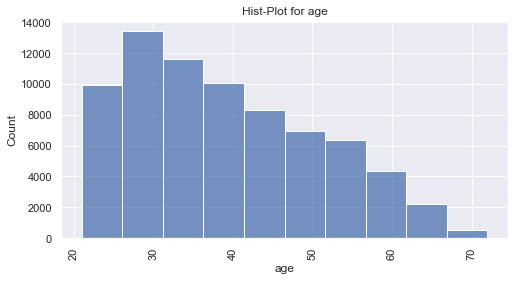

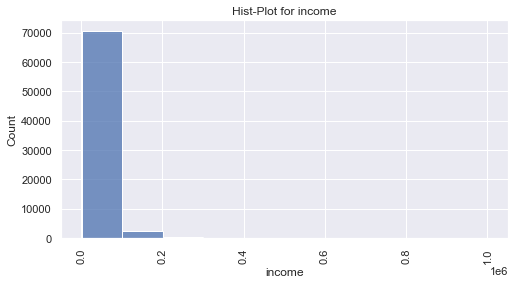

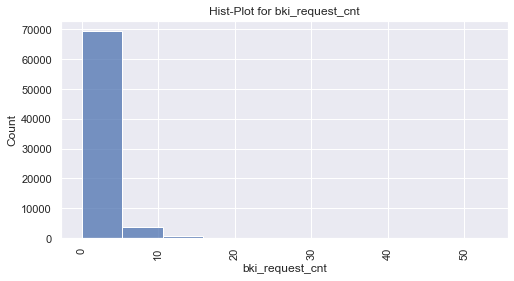

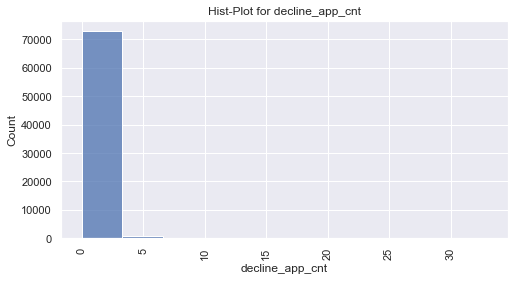

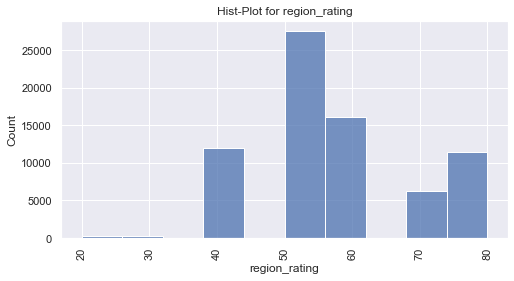

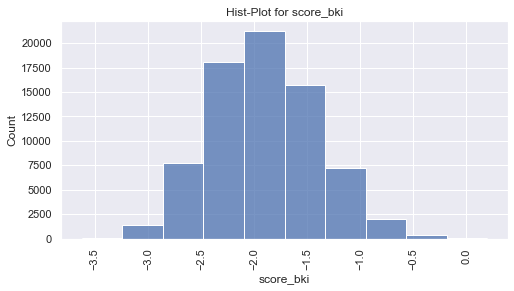

In [20]:
#Вывод информации
for c in col_num:
    show_histplot(df[df['Kaggle'] == 0],c)

***Видно, что score_bki и region_rating имеют около нормальное распределение, а age скошен вправо. Остальные столбцы имеют сильный скос - скорее всего, эскпоненциальное распределение. Для удобства работы с последним приведем его к более похожему на нормальное с помощью логарифмирования.***

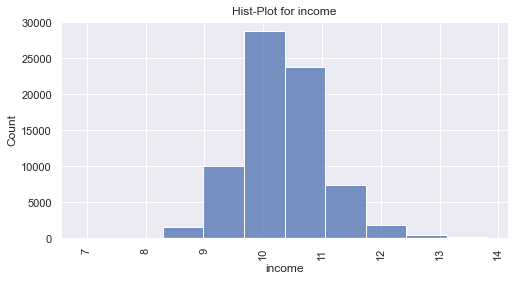

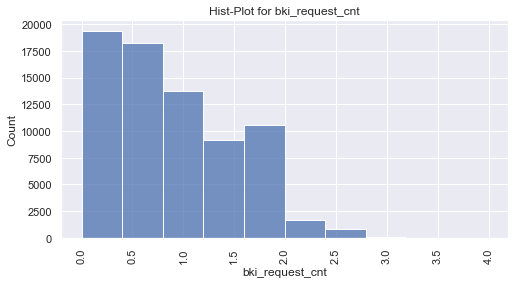

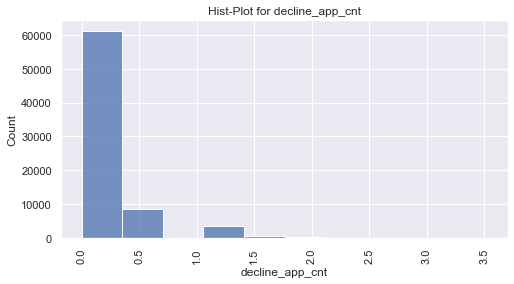

In [21]:
#Убираем столбец 'score_bki','region_rating', так как они итак имеет нормальное распределение
col_num_sub = col_num.copy()
col_num_sub.remove('score_bki')
col_num_sub.remove('region_rating')
col_num_sub.remove('age')
for c in col_num_sub:
    df[c] = df[c].apply(lambda x: np.log(1+x))
    show_histplot(df[df['Kaggle'] == 0],c)

***Как видно с графиков, разброс значений существенно уменьшился, а распределение income вообще стало походить на нормальное.***

## 3.5) education

In [22]:
#Уникальные значения
(df.groupby('Kaggle')['education'].value_counts(dropna=False, normalize=True) * 100).round(3)

Kaggle  education
0       SCH          52.657
        GRD          31.660
        UGR          13.301
        PGR           1.703
        NaN           0.416
        ACD           0.263
1       SCH          52.651
        GRD          31.371
        UGR          13.568
        PGR           1.673
        NaN           0.470
        ACD           0.267
Name: education, dtype: float64

***Данный столбец содержит пропущенные значения, попробуем убрать их путем замены, так как удалить не получится - тестовый DF тоже содержит NaN.***

In [23]:
#Распределение других параметров среди NaN
df_sub = df[df['education'].isna()] #Выделение массива

***Рассмотрим, есть ли среди прецендентов с пропущенными значениями явный перекос распределений в сравнении с генеральной совокупностью.***

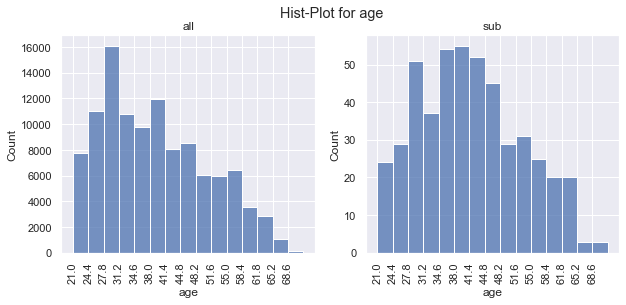

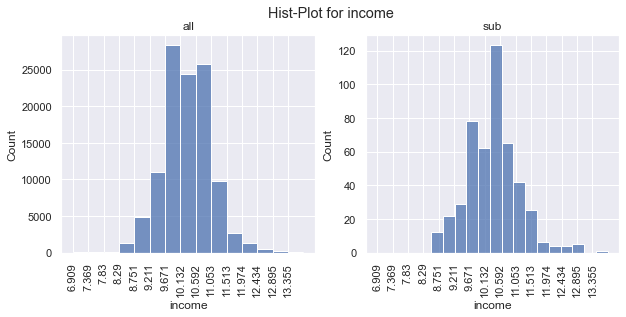

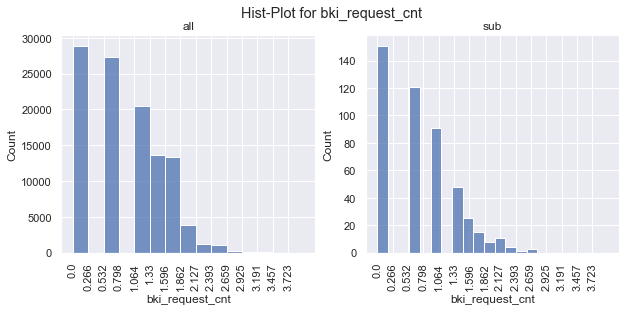

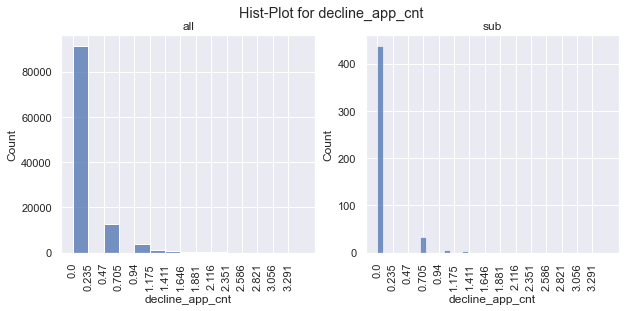

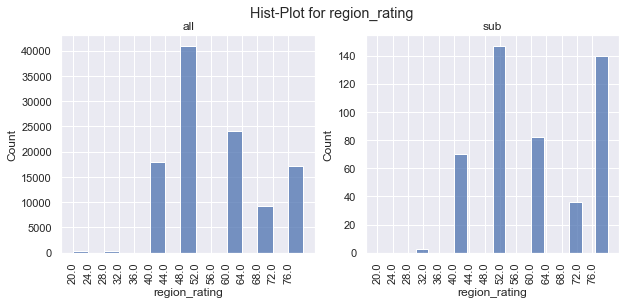

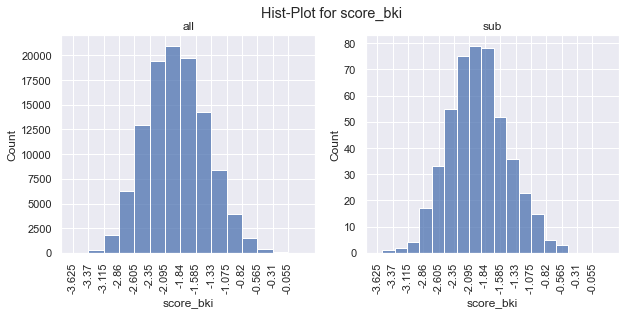

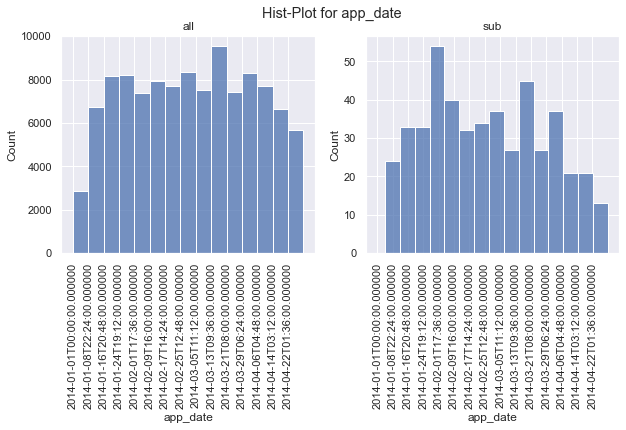

In [24]:
#Числовые параметры & date
for c in col_num+['app_date']:
    show_NHopiz_histplot((df,df_sub),c,('all','sub'),size=(10,4),bins=15)

***Аналогично не только по числовым, но и по номинативным, признакам.***

In [25]:
#Категориальные & Бинарные параметры
for c in col_bin + col_cat:
    print(c)
    d_sub = df_sub[c].value_counts(normalize=True).to_frame().rename(columns={c:'sub'})
    d_all = df[c].value_counts(normalize=True).to_frame().rename(columns={c:'all'})
    print((pd.concat([d_sub,d_all],axis=1)*100).round(3))

sex
      sub     all
0  54.393  56.139
1  45.607  43.861
car
      sub     all
0  58.159  67.446
1  41.841  32.554
car_type
      sub     all
0  83.891  80.927
1  16.109  19.073
good_work
      sub     all
0  85.774  83.449
1  14.226  16.551
foreign_passport
      sub     all
0  82.636  85.086
1  17.364  14.914
home_address
      sub     all
2  59.414  54.101
1  39.331  44.202
3   1.255   1.697
work_address
      sub     all
3  65.690  60.930
2  24.895  27.927
1   9.414  11.143
sna
      sub     all
1  71.130  64.169
4  15.690  15.870
2   9.833  14.373
3   3.347   5.587
first_time
      sub     all
3  36.192  42.296
4  35.146  25.436
1  15.900  16.610
2  12.762  15.658


***С гистограмм и распределений по номинативным группам видно, что выборка почти не отличается от генеральной совокупности, то есть является репрезентативной. Единственное отличие - в выборке преобладание более старого поколения. Поэтому заменим пропущенные значения преобладающими признаками в каждой из групп.***

In [26]:
#Функция для разбиения по группам
def ind(x):
    vc = x.value_counts()
    if len(vc) > 0:
        return vc.index[0]
    else:
        return np.nan
    pass
#Разбиение по группам
df_sub = df.groupby(col_bin + col_cat)['education'].agg(ind)
#Пропуски
df_sub.value_counts(dropna=False)

GRD    904
SCH    837
UGR    126
PGR     12
ACD      4
NaN      1
Name: education, dtype: int64

In [27]:
#Заполнение пропусков
df_sub.fillna(df_sub.value_counts().index[0],inplace=True)

In [28]:
#Функция для заполнения пропусков
def replace_education_nan(x):
    res = []
    for c in col_bin + col_cat:
        res += [x[c]]
    res = tuple(res)    
    return df_sub[res]
#Заполнение пропусков
df.loc[df['education'].isna(),'education'] = df[df['education'].isna()].apply(replace_education_nan, axis=1)

***Как было сказано выше, признак ординальный и его можно закодировать в соответствии с этим.***

In [29]:
#SCH          Школьное образование
#UGR          Кандидат в бакалавры
#GRD          Бакалавр
#PGR          Магистр
#ACD          Академик

In [30]:
#Кодирование признака
dict_education = {'SCH':0,'UGR':1,'GRD':2,'PGR':3,'ACD':4}
df['education'].replace(dict_education,inplace=True)

## 3.6) col_cat

In [31]:
#Количество уникальных значений
for c in col_cat:
    print(c, df[c].nunique(), df[c].unique())

home_address 3 [1 2 3]
work_address 3 [2 3 1]
sna 4 [4 1 2 3]
first_time 4 [1 4 3 2]


In [32]:
#Dummy-кодирование
for c in col_cat:
    df = pd.concat([df,pd.get_dummies(df[c],prefix=c)],axis=1)

## 3.7) feature engineering

In [33]:
#Столбцы (отсечение dummy признаков, чтобы не мешались)
cols = df.iloc[:,:-15].columns

***ML алгоритм не будет работать с нечисловым форматом, а последний таковой остался - app_date.***

In [34]:
#Интервал
df['app_date'].max(), df['app_date'].min()

(Timestamp('2014-04-30 00:00:00'), Timestamp('2014-01-01 00:00:00'))

***Всего 4 месяца в генеральной совокупности - 2 летних и 2 зимних.***

In [35]:
#Выходные
df['IsOutput'] = df['app_date'].dt.weekday > 5

In [36]:
#Праздники
list_date = list(pd.to_datetime(np.arange(0,8), unit='D',origin=pd.Timestamp('2014-01-01'))) +\
[pd.Timestamp('2014-02-23')] + [pd.Timestamp('2014-03-08'), pd.Timestamp('2014-03-10')]
df['IsHoliday'] = df['app_date'].apply(lambda x: x in list_date)

In [37]:
#Праздники и выходные (не рабочий день)
df['IsNotWorkDay'] = df['IsHoliday'] | df['IsOutput']

In [38]:
#Зима
df['IsWinter'] = df['app_date'].dt.month <= 2
#Весна
df['IsSpring'] = df['app_date'].dt.month > 2

In [39]:
#Номер дня
df['N_day'] = df['app_date'].dt.dayofyear

In [40]:
#Номер недели & День недели
df[['N_week','day_of_week']] = df['app_date'].dt.isocalendar()[['week','day']]

In [41]:
#Словарь для замены - количество дефолтов в день
dict_default_in_day = dict(df.groupby('N_day')['default'].agg(sum))
#Словарь для замены - процент дефолтов в день
dict_per_default_in_day = dict(df[df['Kaggle'] == 0].groupby('N_day')['default'].agg(lambda x: sum(x) / len(x)))
#Словарь для замены - кумулятивная сумма в день
dict_default_cumsum_day = dict(df.groupby('N_day')['default'].agg(sum).cumsum())

#Словарь для замены - количество дефолтов в неделю
dict_default_in_week = dict(df.groupby('N_week')['default'].agg(sum))
#Словарь для замены - процент дефолтов в неделю
dict_per_default_in_week = dict(df[df['Kaggle'] == 0].groupby('N_week')['default'].agg(lambda x: sum(x) / len(x)))
#Словарь для замены - кумулятивная сумма в неделю
dict_default_cumsum_week = dict(df.groupby('N_week')['default'].agg(sum).cumsum())

#Словарь для замены - количество дефолтов в день недели
dict_default_in_dayofweek = dict(df.groupby('day_of_week')['default'].agg(sum))
#Словарь для замены - процент дефолтов в день недели
dict_per_default_in_dayofweek = dict(df[df['Kaggle'] == 0].groupby('day_of_week')['default'].agg(lambda x: sum(x) / len(x)))
#Словарь для замены - кумулятивная сумма в дни неделю
dict_default_cumsum_dayofweek = dict(df.groupby('day_of_week')['default'].agg(sum).cumsum())

In [42]:
#Замена
df['default_in_day'] = df['N_day'].replace(dict_default_in_day)
df['per_default_in_day'] = df['N_day'].replace(dict_per_default_in_day)
df['default_cumsum_day'] = df['N_day'].replace(dict_default_cumsum_day)
df['default_in_week'] = df['N_week'].replace(dict_default_in_week)
df['per_default_in_week'] = df['N_week'].replace(dict_per_default_in_week)
df['default_cumsum_week'] = df['N_week'].replace(dict_default_cumsum_week)
df['default_in_dayofweek'] = df['day_of_week'].replace(dict_default_in_dayofweek)
df['per_default_in_dayofweek'] = df['day_of_week'].replace(dict_per_default_in_dayofweek)
df['default_cumsum_dayofweek'] = df['day_of_week'].replace(dict_default_cumsum_dayofweek)

In [43]:
#Score_bki к числу запросов в bki
df['score_per_bkiCNT'] = df['score_bki'] / (df['bki_request_cnt'] + 1)
#Score_bki к числу отказов
df['score_per_appCNT'] = df['score_bki'] / (df['decline_app_cnt'] + 1)

***Рассмотрим гистограмму параметра score_bki. Среднее значение -1.9, а отклонение 0.5. Можно предположить, что это значения z-score, выдаваемое bki, по которому можно определить p-уровень значимости.***

<AxesSubplot:>

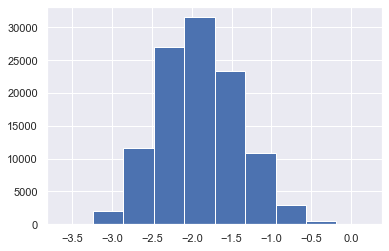

In [44]:
#Гистограмма score_bki
df['score_bki'].hist()

In [45]:
#Тестовый параметр
df['score_bki_1'] = norm.cdf(df['score_bki'] / df['decline_app_cnt'])
df['score_bki_2'] = 1 - 2 * norm.cdf(df['score_bki'])

<AxesSubplot:>

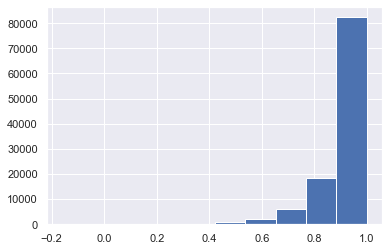

In [46]:
#Гистограмма score_bki_2
df['score_bki_2'].hist()

***Действительно, похоже на распределение p-уровня значимости.***

In [47]:
#Создание промежуточных DF
df_sum_0 = df.query('Kaggle==0').groupby(col_cat+col_ord)[['score_bki','bki_request_cnt',
                                                           'decline_app_cnt','region_rating']].agg('mean')
df_sum_1 = df.query('Kaggle==1').groupby(col_cat+col_ord)[['score_bki','bki_request_cnt',
                                                           'decline_app_cnt','region_rating']].agg('mean')
#Список с пропущенными значениями
nan_list = [c for c in list(df_sum_1.index) if c not in list(df_sum_0.index)]
#Заполнение
for i in nan_list:
    df_sum_0.loc[i,:] = 0
#Создание параметров по группам
df_sub = df[col_cat+col_ord].apply(lambda x: df_sum_0.loc[tuple(x.values)],axis=1)
df_sub.columns = ['score_bki_mean_in_group','bki_request_cnt_mean_in_group',
                  'decline_app_cnt_mean_in_group','region_rating_mean_in_group']
#Объединение
df = pd.concat([df,df_sub],axis=1)

***Посмотрим на зависимость количества (относительного) дефолтов от даты. С графика видно, что банк со временем начинает выдавать все меньше и меньше неблагоприятных для себя кредитов. Но можно отметить 2 точки на графике: 1) начиная с 25 дня, темп падения количества дефолтов сократился; 2) начиная с 90 дня, темп падения количества дефолтов ускорился.***

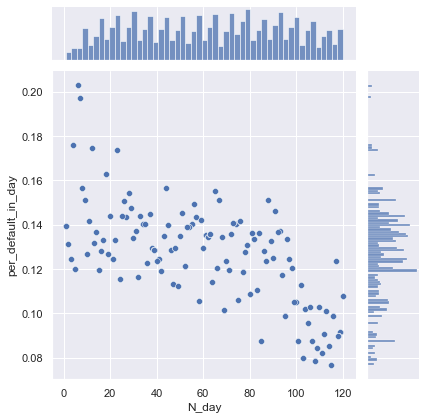

In [48]:
#Распределение относительное количество дефолтов по дням
sns.jointplot(x='N_day',y='per_default_in_day',data=df)
#Метка когда выдано заключение
df['N_day<25'] = df['N_day'] < 25
df['N_day>90'] = df['N_day'] > 90

## 3.8) Отсеивание признаков

In [49]:
#Только для тренировочного набора
df_sub = df[df['Kaggle'] == 0].copy()

<AxesSubplot:>

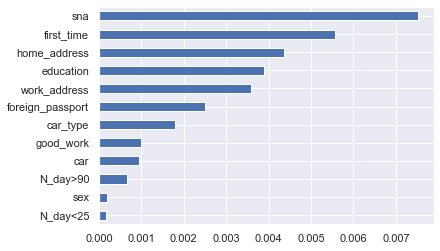

In [50]:
#Бинарные и категориальные признаки
cols = col_bin+col_cat+col_ord+['N_day<25','N_day>90']
imp_cat = pd.Series(mutual_info_classif(df_sub[cols], df_sub['default'],
                                     discrete_features=True), index=cols)
imp_cat.sort_values(inplace=True)
imp_cat.plot(kind = 'barh')

<AxesSubplot:>

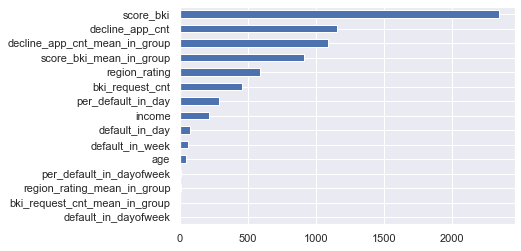

In [51]:
#Числовые признаки
col_num_sub = col_num.copy()
col_num_sub += ['default_in_day','per_default_in_day','default_in_week',
                'default_in_dayofweek','per_default_in_dayofweek',
                'score_bki_mean_in_group','bki_request_cnt_mean_in_group',
                'decline_app_cnt_mean_in_group','region_rating_mean_in_group']
imp_num = pd.Series(f_classif(df_sub[col_num_sub], df_sub['default'])[0], index=col_num_sub)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

***Как показывает предварительный анализ, часть параметров не имеет связи с целевым (по ANOVA).***

In [52]:
#Удаление незначимых параметров
l_cat = list(imp_cat[imp_cat < 0.0015].index)
l_num = list(imp_num[imp_num < 75].index)
print('Отсеянные номинативные признаки: ',l_cat)
print('Отсеянные численные признаки: ',l_num)
df.drop(columns=l_cat,inplace=True)
df.drop(columns=l_num,inplace=True)

Отсеянные номинативные признаки:  ['N_day<25', 'sex', 'N_day>90', 'car', 'good_work']
Отсеянные численные признаки:  ['default_in_dayofweek', 'bki_request_cnt_mean_in_group', 'region_rating_mean_in_group', 'per_default_in_dayofweek', 'age', 'default_in_week']


## 3.9) Удаление коррелирующих признаков

***Напишем алгоритм для автоматического удаления коррелирующих параметров, но укажем какие точно удалять не надо.***

In [53]:
#Выделение списка столбцов
cols = list(df.columns)
#Удаление лишних категориальных признаков из анализа
cols_drop = ['home_address','work_address','sna','first_time','app_date','Kaggle','default']
for c in cols_drop:
    cols.remove(c)
#Копирование DF
df_sub = df.copy()
#Счетчик цикла
m = 0
#Список удаляемых параметров
cols_drop = []
#Список признаков, которые точно нельзя удалять
cols_not_drop = ['N_day','score_bki']
#Цикл удаления всех коррелирующих признаков
while True:
    m += 1
    C = Counter()
    #Поиск только по тренировочной выборке
    dt = df_sub.query('Kaggle==0')[cols].corr()
    #Длина таблицы
    n = len(dt)
    #Поиск признака, чья корреляция с другим выше 0.8 и запись в Counter
    for i in range(n):
        for j in range(n):
            #Только выше главной диагонали
            if j > i:
                l = list(dt.index)
                row = l[i]
                col = l[j]
                if abs(dt.loc[row,col]) > 0.8:
                    C[row] += 1
                    C[col] += 1
    #Если коррелирующие признаки имеются
    if len(C) > 0:
        #Название признака
        i = 0
        while True:
            c = C.most_common()[i][0]
            #Если признак в черном списке
            if c in cols_not_drop:
                i += 1
                if i > n:
                    break
            else:
                break
        #Удаление признака из DF и списка столбцов
        df_sub.drop(columns=[c],inplace=True)
        cols.remove(c)
        #Запись признака
        cols_drop += [c]
        print('Итерация: {}. Удален признак: {}'.format(m,c))
    else:
        break

Итерация: 1. Удален признак: N_week
Итерация: 2. Удален признак: default_cumsum_day
Итерация: 3. Удален признак: default_cumsum_week
Итерация: 4. Удален признак: home_address_1
Итерация: 5. Удален признак: IsWinter
Итерация: 6. Удален признак: score_per_appCNT
Итерация: 7. Удален признак: score_bki_2
Итерация: 8. Удален признак: IsOutput
Итерация: 9. Удален признак: IsSpring
Итерация: 10. Удален признак: per_default_in_week
Итерация: 11. Удален признак: day_of_week


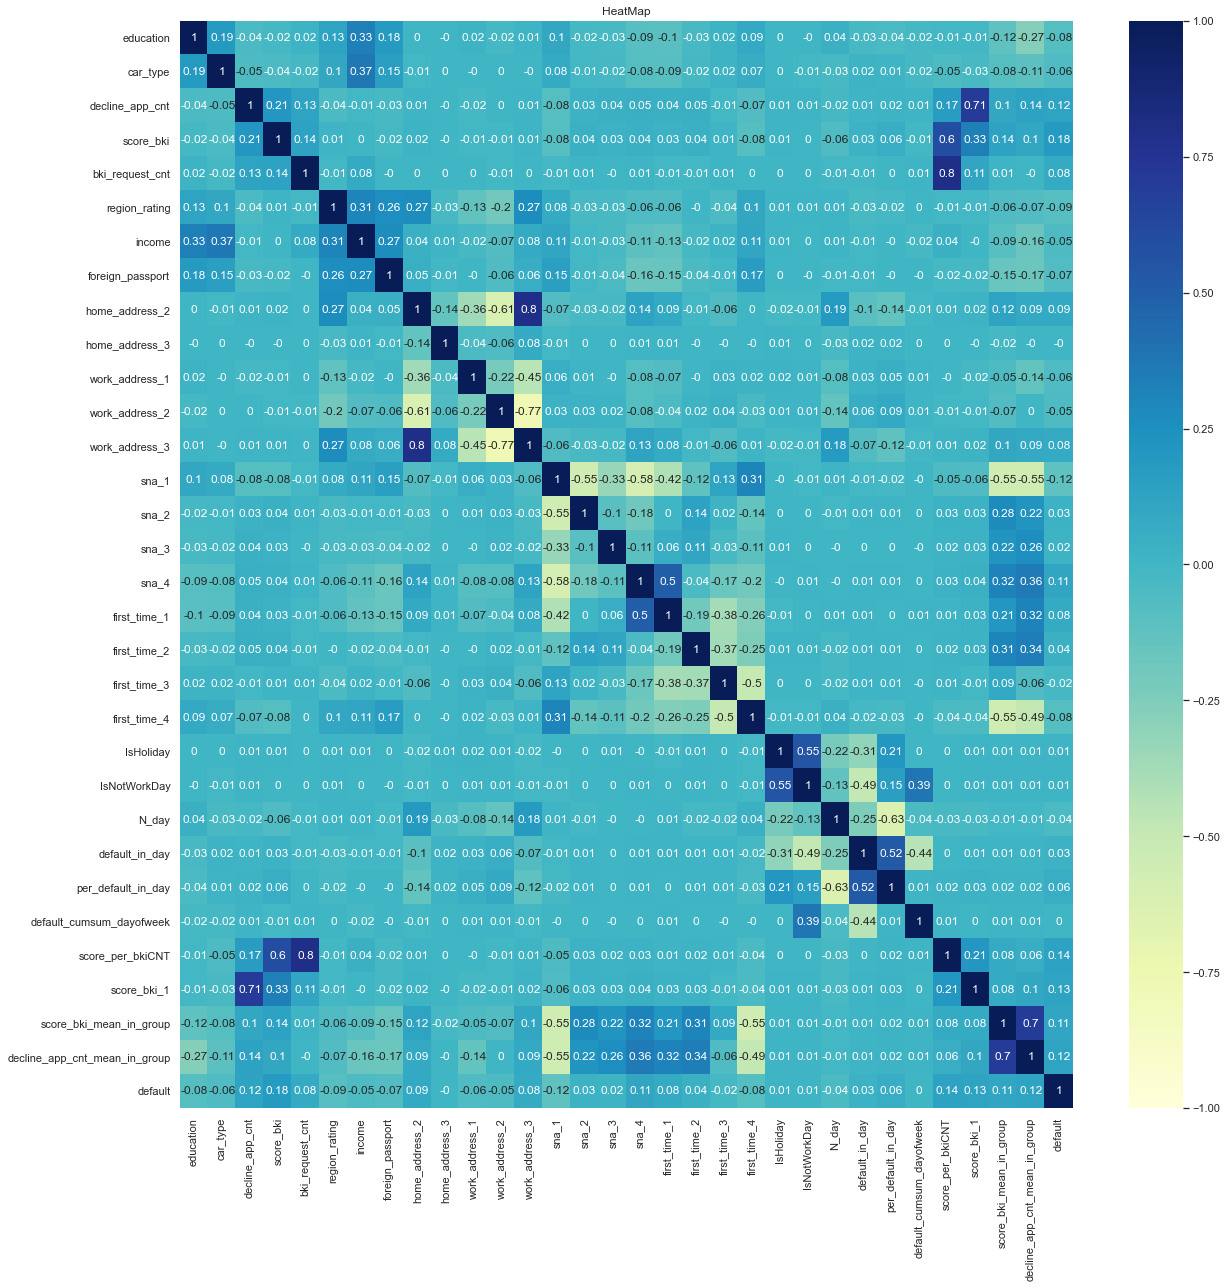

In [54]:
#Замена
df = df_sub
#Тепловая карта
show_Heatmap(df[df['Kaggle'] == 0],cols+['default'])

***Алгоритм работает верно, корреляции выше 0.8 по модулю не наблюдается.***

## 3.10) Удаление выбросов

In [55]:
#Выделение столбцов
col_num_sub = col_num.copy()
col_num_sub += [
    'per_default_in_day','default_in_day','decline_app_cnt_mean_in_group','score_bki_mean_in_group'
               ]
col_num_sub.remove('decline_app_cnt')  #Нельзя чистить (пункт 5.4)
col_num_sub.remove('age')              #Данный признак уже удален
col_num_sub.remove('score_bki')        #Почистим его отдельно с учетом таргета

***Параметр score_bki имеет самую сильную корреляцию с целевым признаком и поэтому очистим его от выбросов с учетом разбиения по этому целевому признаку. Параметр decline_app_cnt удален из рассмотрения, так как при очистке выбросов по нему качество модели (параметр ROC_AUC score) улучшается на 0.1 на валидации, но на тесте становится хуже на 0.15 (см.ниже, п.5.4). В целом для выбросов выбраны признаки, имеющие около нормальное распределение и region_rating.***

In [56]:
#Промежуточная функция для удаления выбросов (необходима для пункта 5.4)
def drop_out_sub(df, cols_1, cols_2):
    #Разделение, чтобы очистить только обучаюшую выборку
    df_train_sub = df[df['Kaggle'] == 0].copy()
    df_test_sub = df[df['Kaggle'] == 1].copy()
    #Удаление выбросов в числовых параметрах
    dL = -1
    while dL != 0:
        print('Новая итерация.')
        dL = 0
        #Удаление выбросов без учета таргета
        for col in cols_1:
            df_train_sub, dl = drop_out(col,df_train_sub)
            #Обновление счетчика
            dL += dl
        #Удаление выбросов с учетом таргета
        for col in cols_2:
            df_train_sub, dl = drop_out_with_target('default',col,df_train_sub)
            #Обновление счетчика
            dL += dl
        print('Количество выбросов {}.'.format(dL))
        print()
    #Объединение
    df = pd.concat([df_train_sub,df_test_sub])    
    return df

In [57]:
#Очистка от выбросов (для пункта 5.4)
df_for_test = drop_out_sub(df, col_num_sub, ['decline_app_cnt','score_bki'])

Новая итерация.
Количество выбросов для параметра income: 1767.
Количество выбросов для параметра bki_request_cnt: 7.
Количество выбросов для параметра region_rating: 11472.
Количество выбросов для параметра per_default_in_day: 1564.
Количество выбросов для параметра default_in_day: 37.
Количество выбросов для параметра decline_app_cnt_mean_in_group: 1316.
Количество выбросов для параметра score_bki_mean_in_group: 869.
Количество выбросов для параметра decline_app_cnt: 7885.
Количество выбросов для параметра score_bki: 258.
Количество выбросов 25175.

Новая итерация.
Количество выбросов для параметра income: 1541.
Количество выбросов для параметра bki_request_cnt: 0.
Количество выбросов для параметра region_rating: 0.
Количество выбросов для параметра per_default_in_day: 533.
Количество выбросов для параметра default_in_day: 0.
Количество выбросов для параметра decline_app_cnt_mean_in_group: 337.
Количество выбросов для параметра score_bki_mean_in_group: 1131.
Количество выбросов для п

In [58]:
#Очистка от выбросов (для основного анализа)
df = drop_out_sub(df, col_num_sub, ['score_bki'])

Новая итерация.
Количество выбросов для параметра income: 1767.
Количество выбросов для параметра bki_request_cnt: 7.
Количество выбросов для параметра region_rating: 11472.
Количество выбросов для параметра per_default_in_day: 1564.
Количество выбросов для параметра default_in_day: 37.
Количество выбросов для параметра decline_app_cnt_mean_in_group: 1316.
Количество выбросов для параметра score_bki_mean_in_group: 869.
Количество выбросов для параметра score_bki: 276.
Количество выбросов 17308.

Новая итерация.
Количество выбросов для параметра income: 1756.
Количество выбросов для параметра bki_request_cnt: 0.
Количество выбросов для параметра region_rating: 0.
Количество выбросов для параметра per_default_in_day: 602.
Количество выбросов для параметра default_in_day: 0.
Количество выбросов для параметра decline_app_cnt_mean_in_group: 0.
Количество выбросов для параметра score_bki_mean_in_group: 0.
Количество выбросов для параметра score_bki: 20.
Количество выбросов 2378.

Новая итера

# 4. EDA

In [59]:
#EDA только по тренировочному набору
df_EDA = df.query('Kaggle==0')
#Список столбцов
df.columns

Index(['app_date', 'education', 'car_type', 'decline_app_cnt', 'score_bki',
       'bki_request_cnt', 'region_rating', 'home_address', 'work_address',
       'income', 'sna', 'first_time', 'foreign_passport', 'default', 'Kaggle',
       'home_address_2', 'home_address_3', 'work_address_1', 'work_address_2',
       'work_address_3', 'sna_1', 'sna_2', 'sna_3', 'sna_4', 'first_time_1',
       'first_time_2', 'first_time_3', 'first_time_4', 'IsHoliday',
       'IsNotWorkDay', 'N_day', 'default_in_day', 'per_default_in_day',
       'default_cumsum_dayofweek', 'score_per_bkiCNT', 'score_bki_1',
       'score_bki_mean_in_group', 'decline_app_cnt_mean_in_group'],
      dtype='object')

In [60]:
#Снова сортировка
col_num = ['decline_app_cnt','score_bki','bki_request_cnt','region_rating','income','N_day',
           'default_in_day','per_default_in_day','default_cumsum_dayofweek','score_per_bkiCNT',
           'score_bki_1','score_bki_mean_in_group','decline_app_cnt_mean_in_group']
col_cat = ['education','car_type','home_address','work_address','sna','first_time','foreign_passport',
           'IsHoliday','IsNotWorkDay']

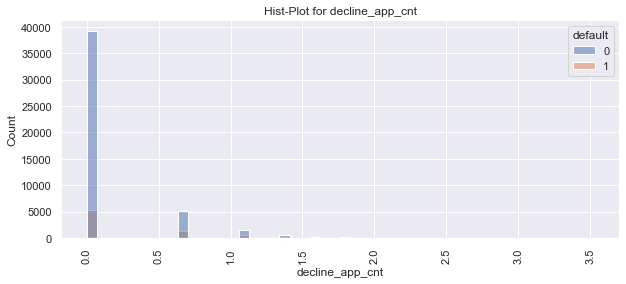

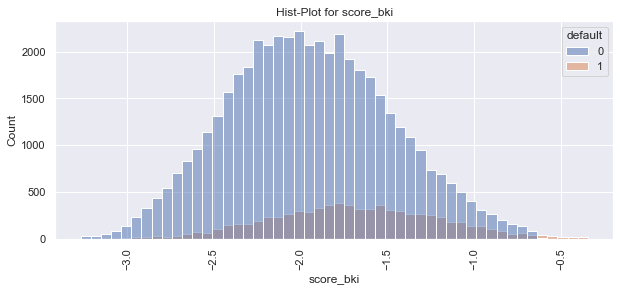

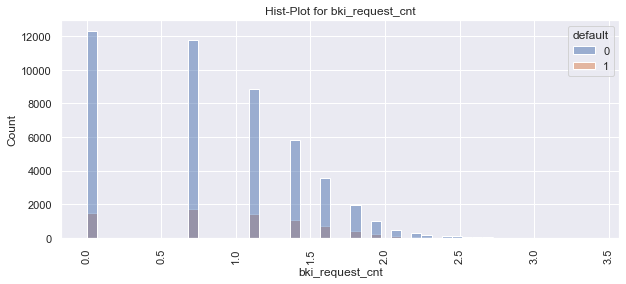

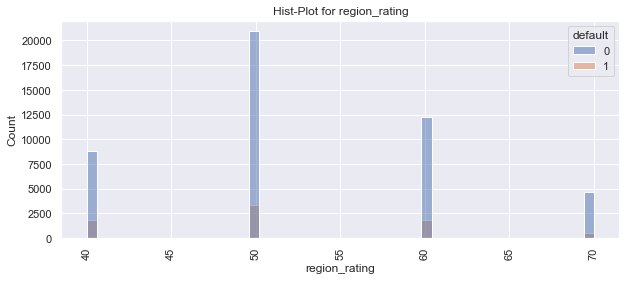

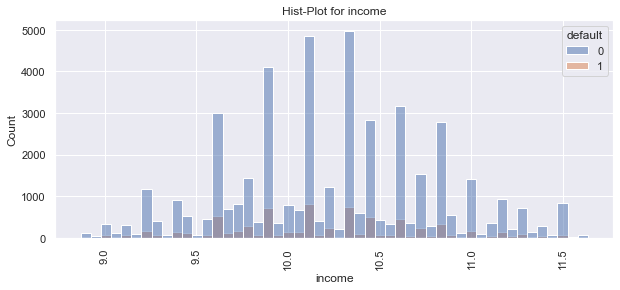

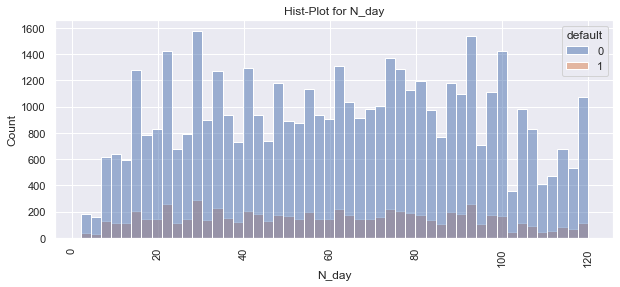

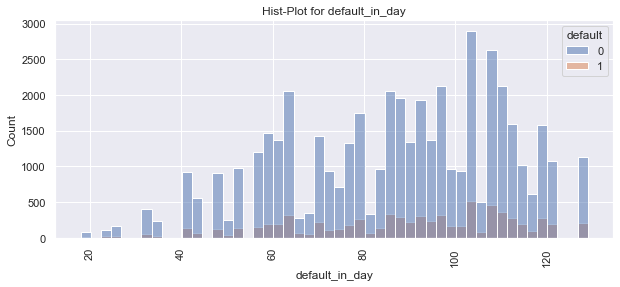

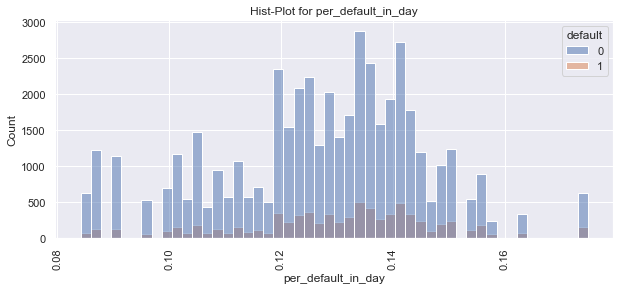

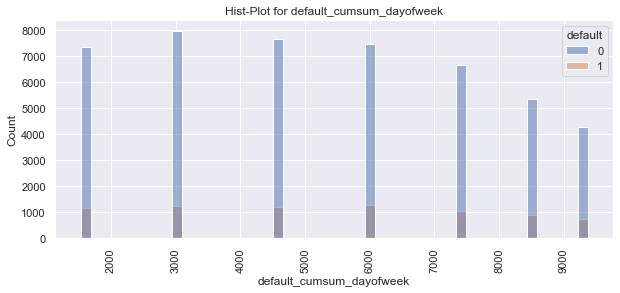

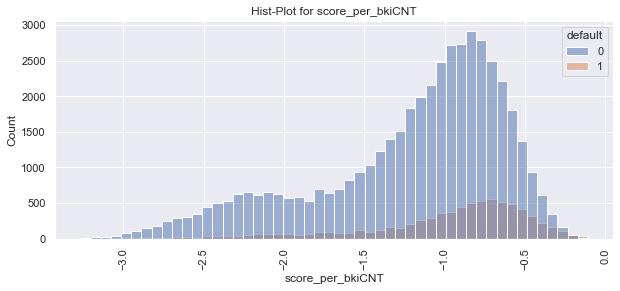

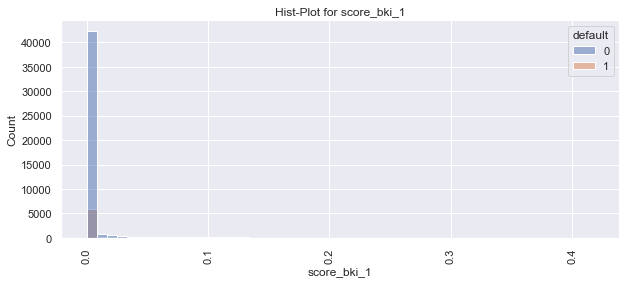

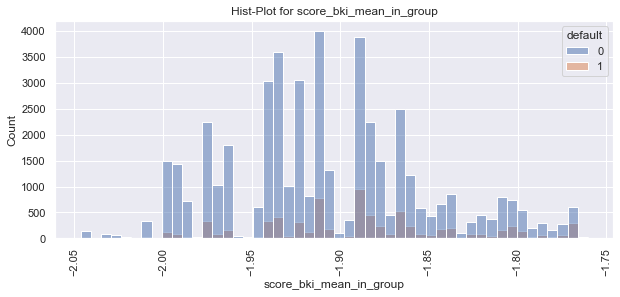

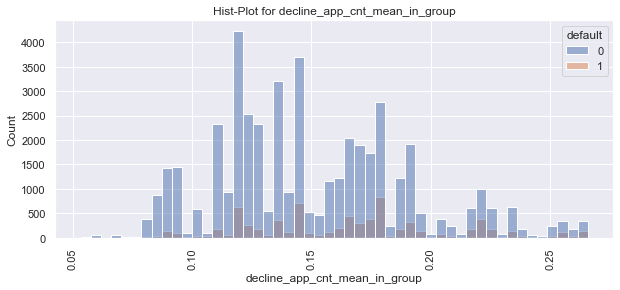

In [61]:
#Анализ гистограмм числовых признаков
for c in col_num:
    show_histplot(df_EDA,c,hue='default',size=(10,4),bins=50)

#### decline_app_cnt, score_bki_1 - Пропорция целевого признака по выборкам с изменением decline_app_cnt сохраняется. Признак распределен экспоненциально.
#### score_bki - Признак распределен нормально. Для дефолтных клиентов среднее значение score_bki смещено в сторону положительных значений.
#### bki_request_cnt - Изначально признак распределен экспоненциально, но после логарифмирования пик гистограммы сильно сгладился. Для дефолтных клиентов аналогично признаку score_bki среднее его значение смещено в сторону больших значений (то есть пропорция выборок (default = 0 | 1) по признаку не сохраняется, как для  decline_app_cnt).
#### region_rating - Удалены выбросы для region_rating < 40 & > 70. Пропорция выборок сохраняется при изменении region_rating.
#### income - Пропорция выборок сохраняется. Можно сказать, что признак "в среднем" распределен нормально, но на гистограмме имеются впадины. Либо пики. То есть датасэт в основном содержит людей с неким уровенем дохода из предложенного списка, а часть прецендентов имеют значения средние между двумя пунктами.
#### N_day - Видно, что с каждым зимним и мартовским днем, в среднем увеличивается число заявок, но при этом сохраняется (в среднем) число дефолтов. То есть можно сказать, что банк с каждым днем учится выдавать более надежные кредиты. Примерно после 90 дня количество клиентов резко начало снижаться (как и количество дефолтов). Признак примерно распределен равномерно.
#### default_in_day - Признак распределен либо хаотично, либо около-нормально со впадинами в некоторые дни. Если считать распределение нормальным, то это распределение можно считать смещенным влево.
#### per_default_in_day, score_bki_mean_in_group, decline_app_cnt_mean_in_group - Аналогично прошлому, но без смещения нормального распределения. В среднем количество дефолтов в день 13%.
#### default_cumsum_dayofweek - Распределение похоже на нормальное с обрезанными концами, либо на примерно равномерное. Если считать его нормальным, то можно заметить, что для дефолтной выборки медианное значение смещено в сторону больших значений.
#### score_per_bkiCNT - Score_bki деленный на количество клиентов. Выборка дефолтная распределена нормально со смещением влево. Выборка не дефолтная имеет два пика, один сильно преобладает над другим (не бимодальная). Можно предположить, что в данной выборке совмещены две выборки, распределенных нормально. Мода распределения немного смещена в сторону отрицательных значений относительно выборки дефолтной.

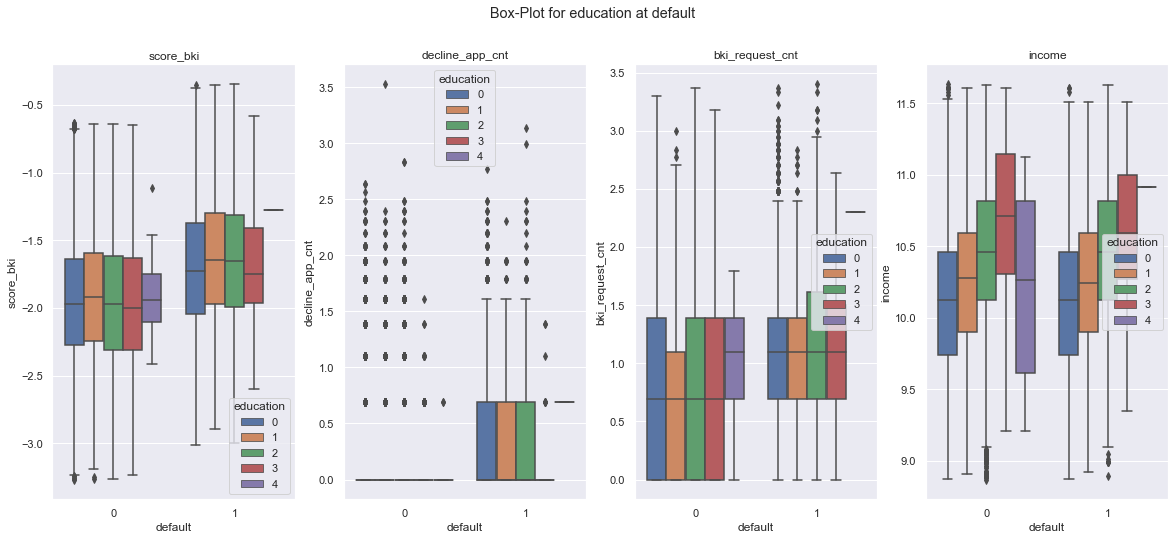

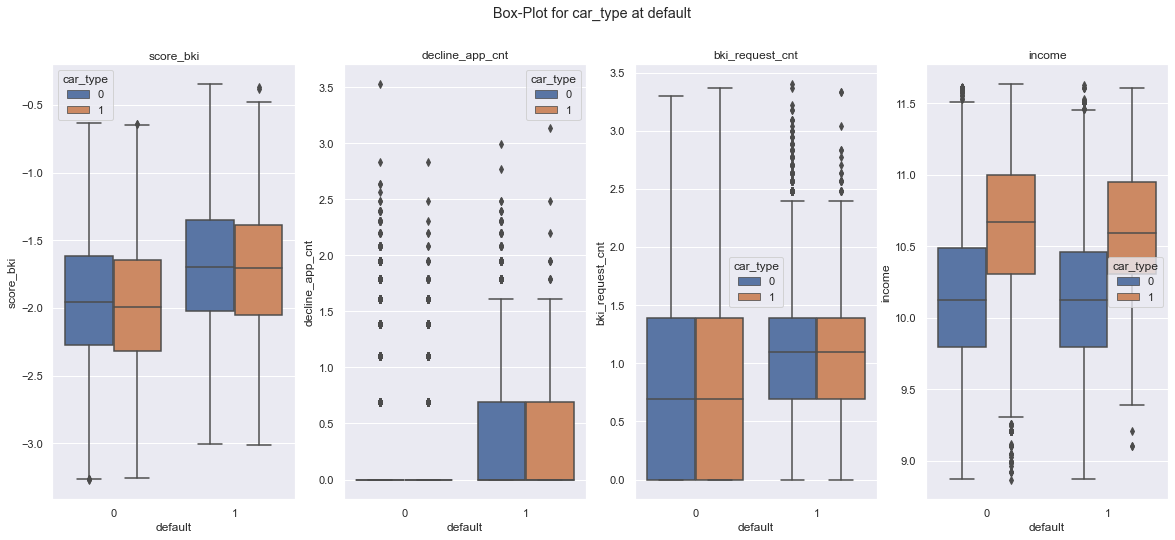

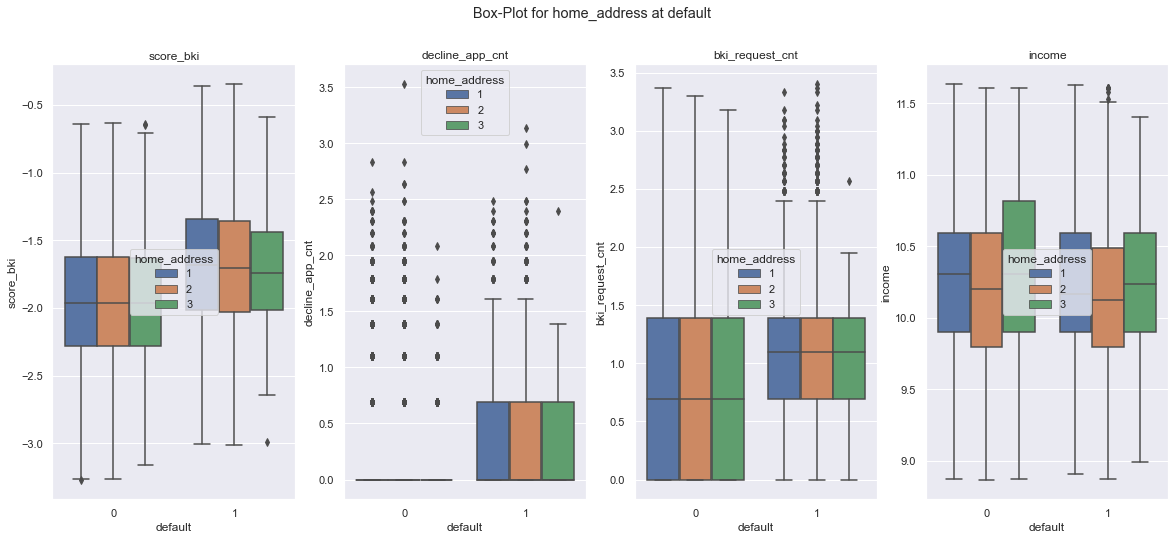

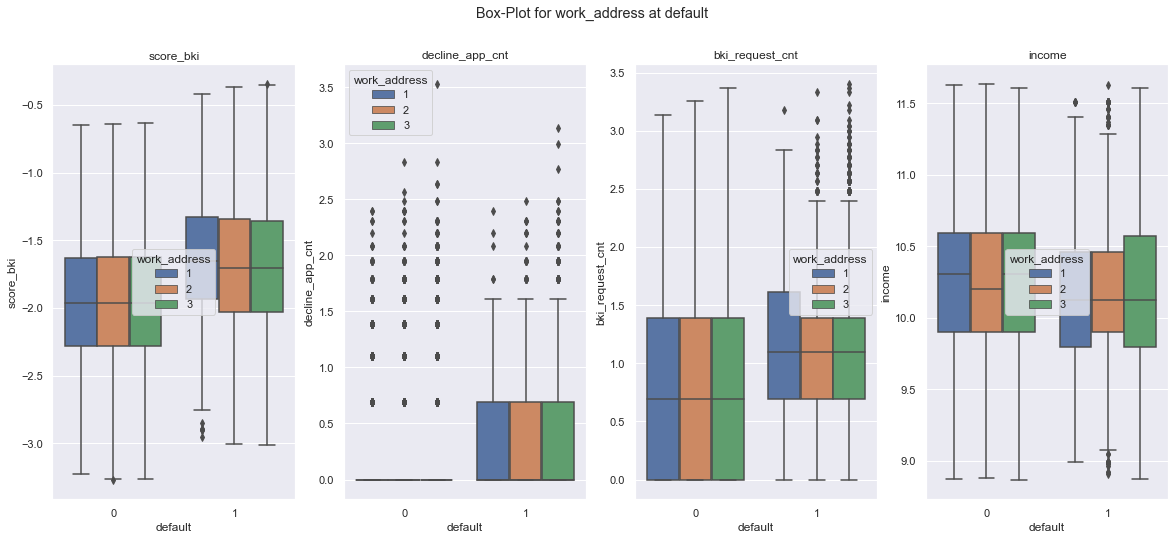

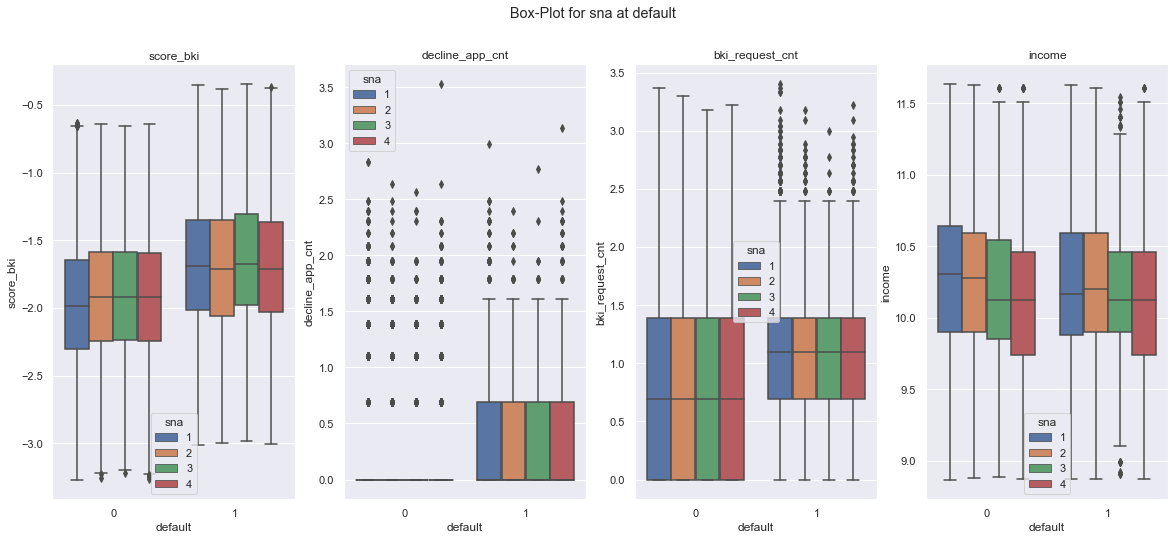

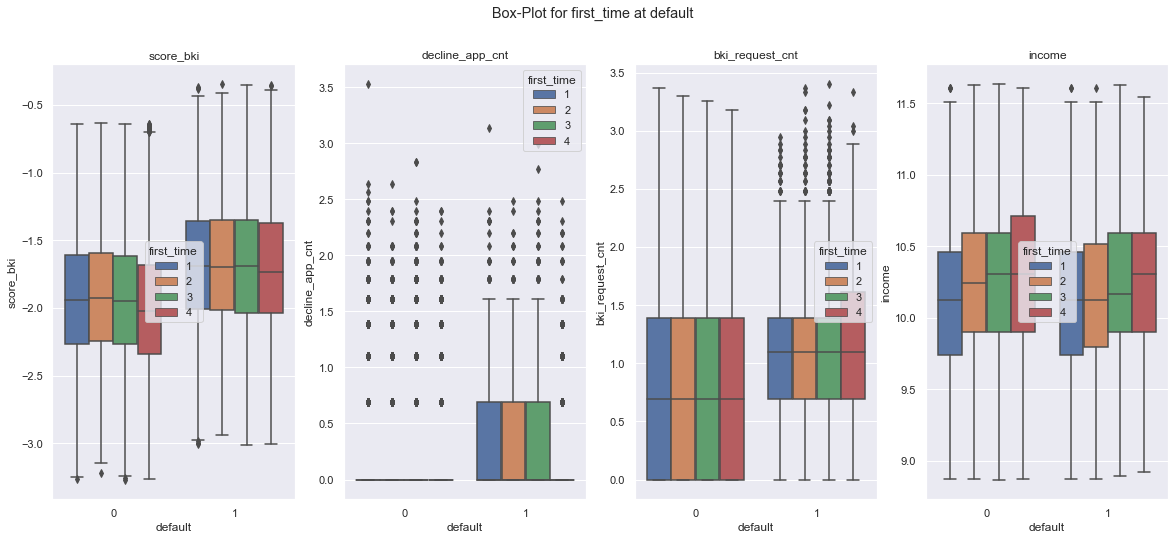

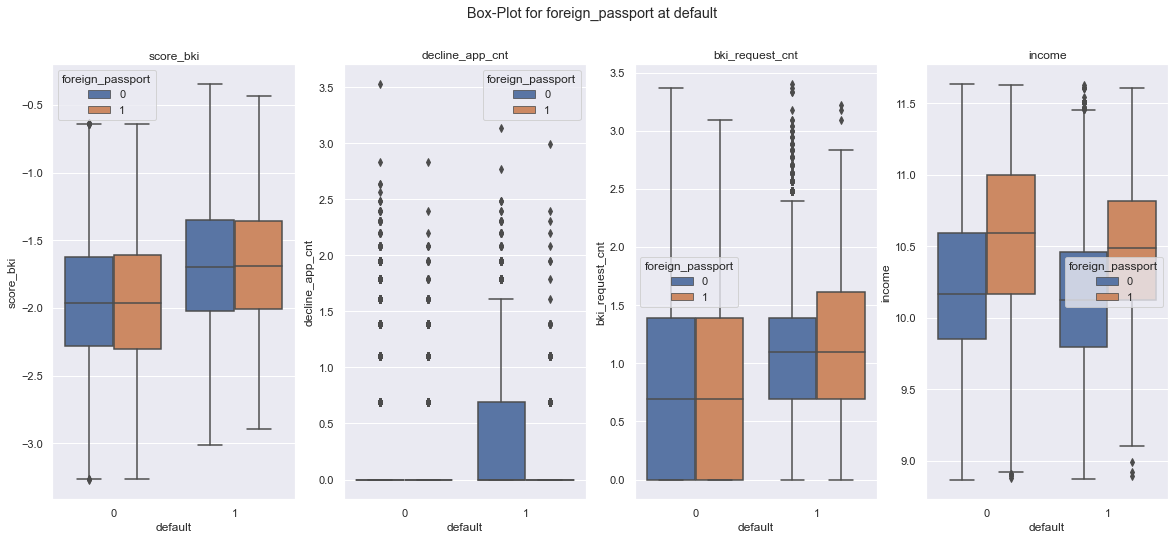

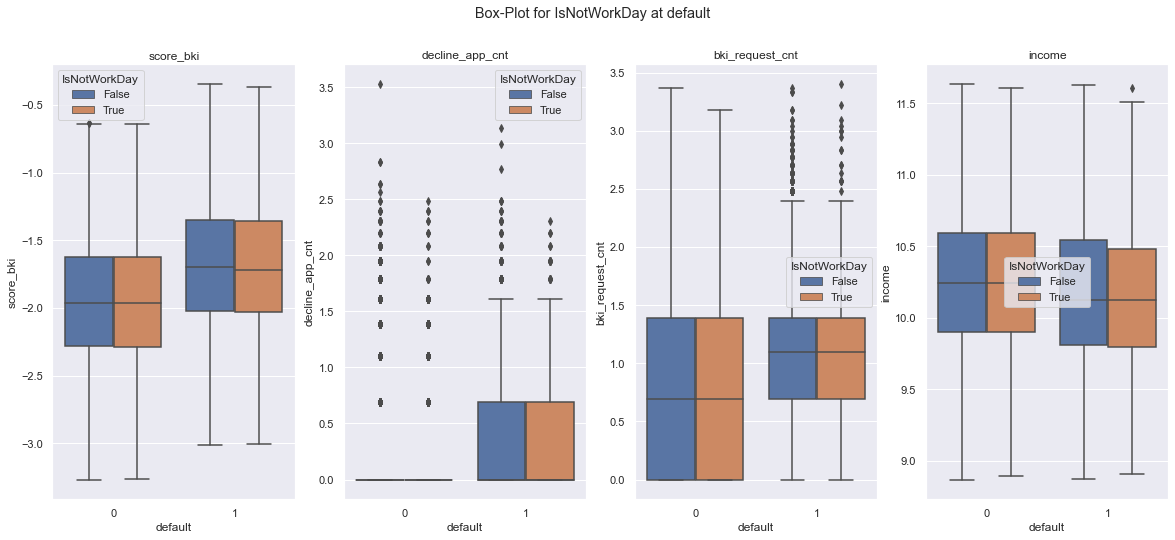

In [62]:
#Анализ гистограмм номинативных признаков
col_cat_sub = col_cat.copy()
col_cat_sub.remove('IsHoliday')
for c in col_cat_sub:
    show_NHopiz_boxplot(df_EDA,'default',['score_bki','decline_app_cnt','bki_request_cnt','income'],c)

## а) education
#### а.1) score_bki - Параметр распределен примерно равномерно по групппам образования людей. Для дефолтных клиентов практически отсутсвует группа академиков (education=5). Прочие группы распределены с высокой дисперсией. Наиболее успешные (по медианному значению) магистры и  бакалавры. Менее успешны кандидаты в бакалавры.
#### а.2) decline_app_cnt - Для не дефолтных клиентов медианное значение практически равно нулю (что логично, хорошим клиентам не отказывают в заявках), в то время, как для дефолтных распределение имеет значительную правую часть (от медианы до третьего квартиля + 1.5*IQR) (то есть все также доверяют, но чаще отказывают, причем для магистров и академиков уровень доверия выше).
#### а.3) bki_request_cnt - Для не дефолтных клиентов медианное значение равно ~0.7, в то время (за исключением академиков - видимо они чаще берут кредиты), как для дефолтных оно смещено в ~1.2 (для академиков в область ~2.3). Можно сделать вывод, что по дефолтным клиентам уровень запроса в среднем выше.
#### а.4) income - Средний уровень дохода не меняется для дефолтной или обратной выборки. Но можно сделать вывод, что по мере увеличения качества образования растет его доход. Кроме академиков: ученым не нужны деньги, им нужны знания. Медианное значение для дефолтных академиков можно объяснить тем, что данная группа почти не содержит прецендентов.

### В дальнейшем опущены выводы по числовым параметрам, как в пункте "а", так как они будут повторять друг друга. Делается акцент на зависимость параметров при разбиении на группы по номинативным признакам.

## б) car_type
#### б.1) score_bki - Иномарка или нет не влияет на данный признак.
#### б.2) decline_app_cnt - Иномарка или нет не влияет на данный признак.
#### б.3) bki_request_cnt - Иномарка или нет не влияет на данный признак.
#### б.4) income - Если у человека иномарка, то уровень его дохода значительно выше.

## в) home_adress
#### в.1) score_bki - Значение home_adress не влияет на данный признак. Группа со значением 3 имеет меньший разброс признака.
#### в.2) decline_app_cnt - Значение home_adress не влияет на данный признак. Группа со значением 3 имеет меньший разброс признака.
#### в.3) bki_request_cnt - Значение home_adress не влияет на данный признак. Группа со значением 3 имеет меньший разброс признака.
#### в.4) income - Клиенты из третьей группы обладают более стабильно-высоким уровнем дохода. Менее стабильным, но также высоким обладают клиенты первой группы. Клиенты второй группы немного, но отстают от них.

## г) work_adress
#### г.1) score_bki - Значение work_adress не влияет на данный признак.
#### г.2) decline_app_cnt - Значение work_adress не влияет на данный признак.
#### г.3) bki_request_cnt - Значение work_adress не влияет на данный признак.
#### г.4) income - Значение work_adress не влияет на данный признак. Можно заметить, что для дефолтных клиентов значения первого, второго и третьего квартилей не постонны, как для первой, в засимости от work_adress.

## д) sna
#### д.1) score_bki - Значение sna слабо влияет на данный признак. Можно сделать вывод, что группа 1 более надежная, а самая не надежная - 3.
#### д.2) decline_app_cnt - Значение sna не влияет на данный признак.
#### д.3) bki_request_cnt - Значение sna не влияет на данный признак.
#### д.4) income - По мере увеличения значения sna падает уровень дохода.

## е) first_time
#### е.1) score_bki - Значение first_time слабо влияет на данный признак. Можно сделать вывод, что группа 4 более надежная, а самая не надежная - 2.
#### е.2) decline_app_cnt - Значение first_time не влияет на данный признак.
#### е.3) bki_request_cnt - Значение first_time не влияет на данный признак.
#### е.4) income - По мере увеличения значения first_time растет уровень дохода.

## ж) foreign_passport
#### ж.1) score_bki - Значение foreign_passport не влияет на данный признак.
#### ж.2) decline_app_cnt - Значение foreign_passport не влияет на данный признак. Разве, что число отказов для дефолтных клиентов с отсутствием загран паспорта значительно растет (третий квартиль не равен нулю).
#### ж.3) bki_request_cnt - Значение foreign_passport не влияет на данный признак.
#### ж.4) income - Для клиентов с загран паспортом растет уровень дохода.

## з) IsNotWorkDay
#### з.1) score_bki - Значение IsNotWorkDay не влияет на данный признак.
#### з.2) decline_app_cnt - Значение IsNotWorkDay не влияет на данный признак. У дефолтных клиентов при разбиении по данному признаку (заявка подана в выходной или нет) количество отказов выше.
#### з.3) bki_request_cnt - Значение IsNotWorkDay не влияет на данный признак.
#### з.4) income - Значение IsNotWorkDay не влияет на данный признак.

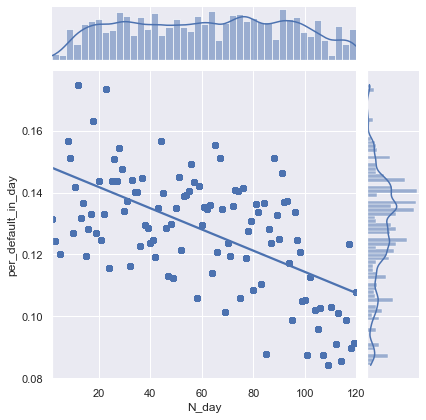

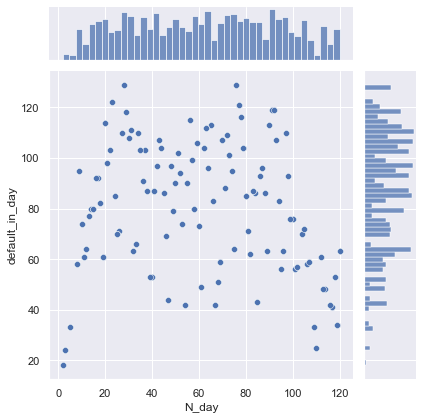

In [63]:
#Распределение по дням
sns.jointplot(data=df_EDA, x='N_day', y='per_default_in_day',kind='reg')
#Распределение по дням
sns.jointplot(data=df_EDA, x='N_day', y='default_in_day')

***С графика видно, что банк со временем начинает выдавать все меньше и меньше неблагоприятных для себя кредитов. Но можно отметить точку на графике - начиная с 90 дня, темп падения количества дефолтов ускорился. Примерно до 25 дня количество дефолтов сильно растет, при условии, что относительное количество падает, что значит, что растет общее количество заявок. Рост заявок в начале года можно объяснить тем, что люди в новогодние праздники не думают о кредитах.***

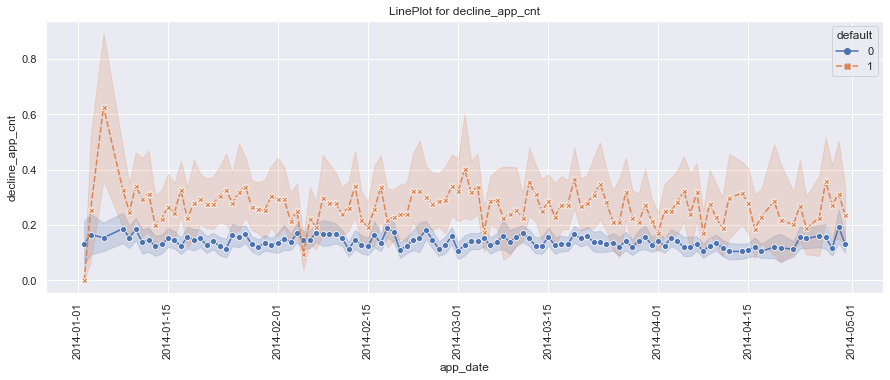

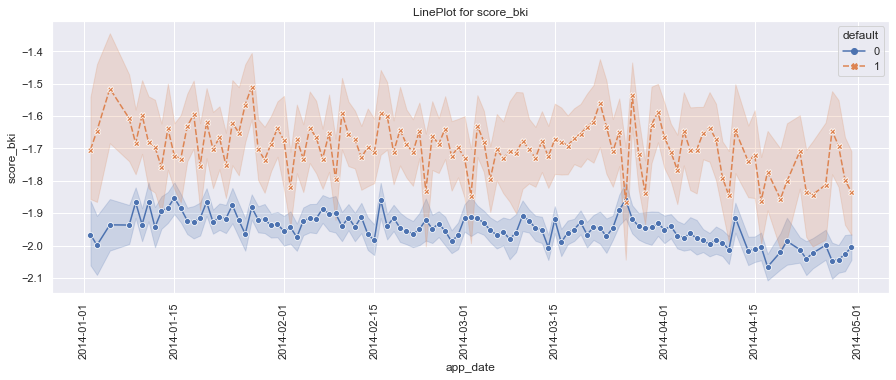

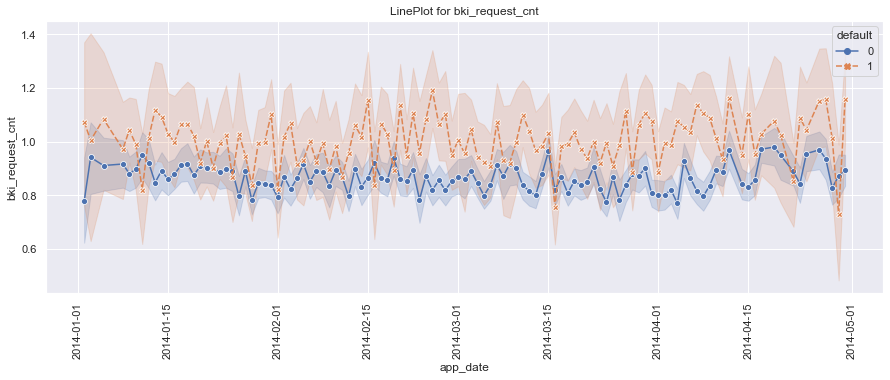

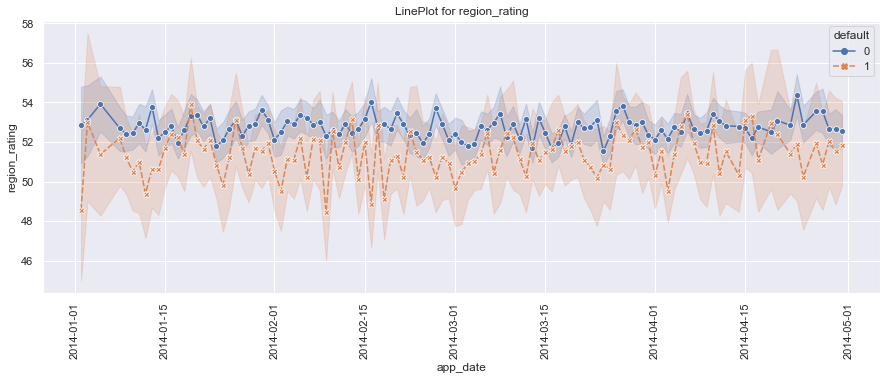

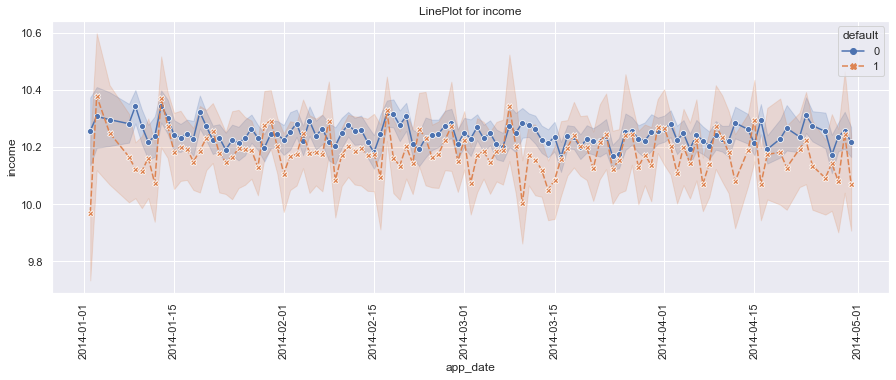

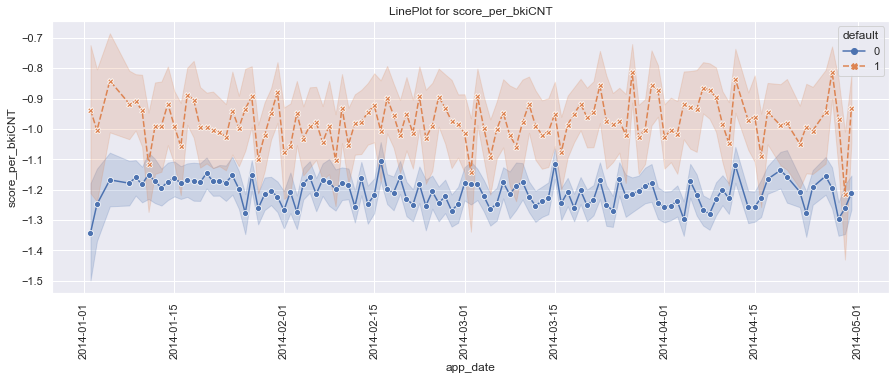

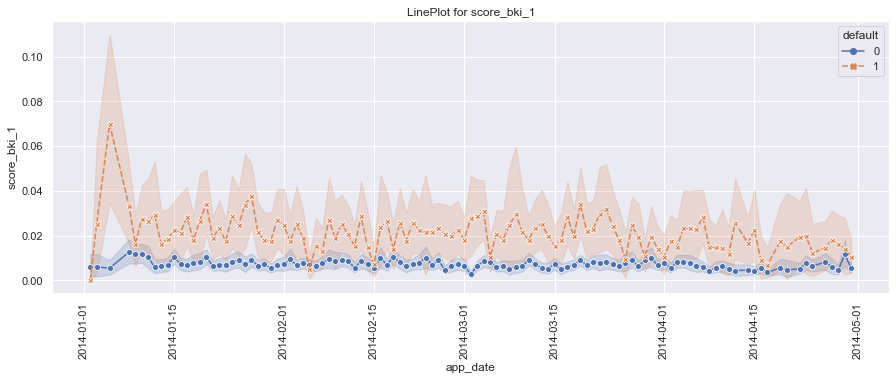

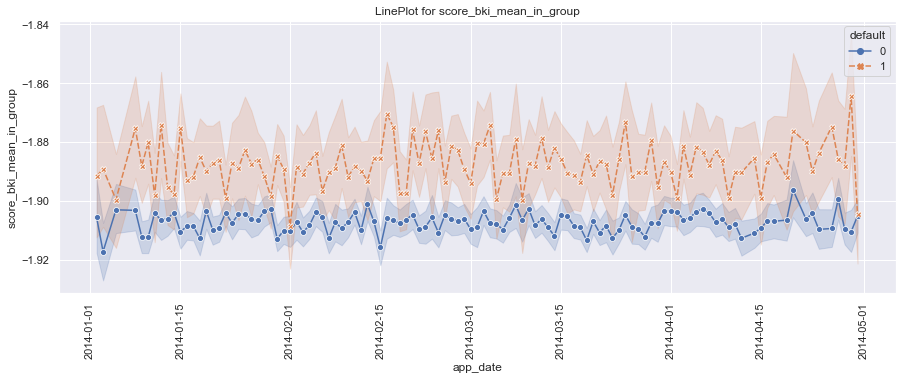

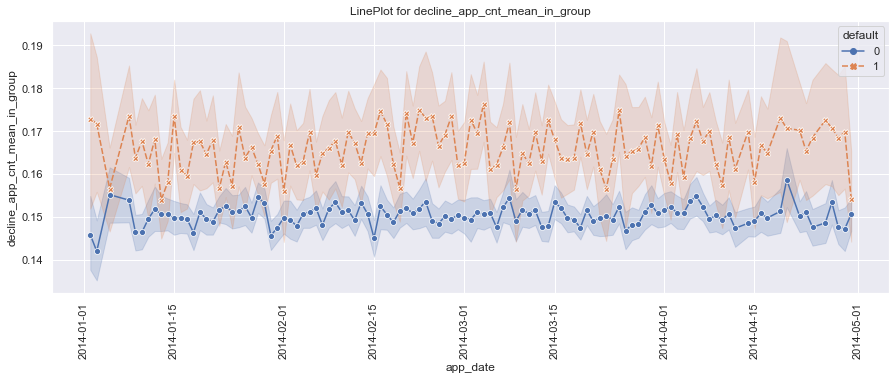

In [64]:
#Анализ признаков по дате
col_num_sub = col_num.copy()
#Не информативны
col_num_sub.remove('N_day')
col_num_sub.remove('default_in_day')
col_num_sub.remove('per_default_in_day')
col_num_sub.remove('default_cumsum_dayofweek')
#Вывод
for c in col_num_sub:
    show_lineplot('app_date',c,df_EDA,'default')

***В данном случае распределение по оси X не очень информативно, так как оно в среднем почти всегда постоянно за исключением некоторых дней, что можно объяснить праздниками, выходными и так далее. Но на данных графиках видны средние значения каждого параметра с учетом разделения на дефолтных и не дефолтных клиентов. По этим графикам можно сделать вывод, что: 1) Дефолтные группы обладают более высоким значением параметров: decline_app_cnt, score_bki, bki_request_cnt, score_per_bkiCNT, score_bki_1, score_bki_mean_in_group, decline_app_cnt_mean_in_group. 2) Дефолтные группы обладают более низким значением параметров: reqion_rating и income. И первое и второе логично: дефолтные клиенты имеют менее высокий уровень дохода и живут в регионах с низким рейтингом (не обязательно все сразу, может по отдельности). Также им свойственно большее число отказов и попыток и более низкий рейтинг скоринга БКИ.***

# 5. ML

***Рассмотрим сначала несбалансированную выборку. Подготовленный датасэт чиститься от лищних столбцов (default,kaggle,категориальных), нормализуется и разбивается, как 7 к 3 с предварительным перемешиванием.***

***Используем K-fold валидацию с n=5, паралелльно определяя оптимальные гиперпараметры модели.***

## 5.1) Логистическая регрессия, несбалансированная модель

Параметры лучшей модели: {'C': 0.1, 'max_iter': 15, 'penalty': 'l2'}
TRAIN:
Accuracy:     0.862
Recall:       0.031
Precision:    0.512
F1-score:     0.059
Log-loss:     4.770
RocAuc-score: 0.722
VALID:
Accuracy:     0.865
Recall:       0.029
Precision:    0.525
F1-score:     0.054
Log-loss:     4.651
RocAuc-score: 0.721


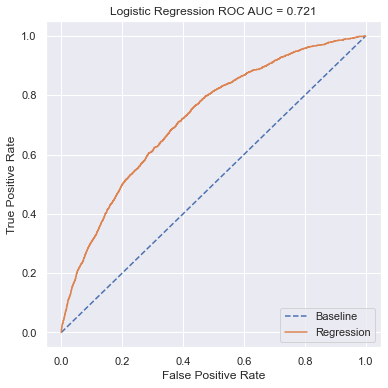

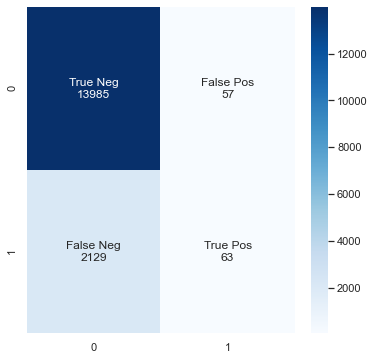

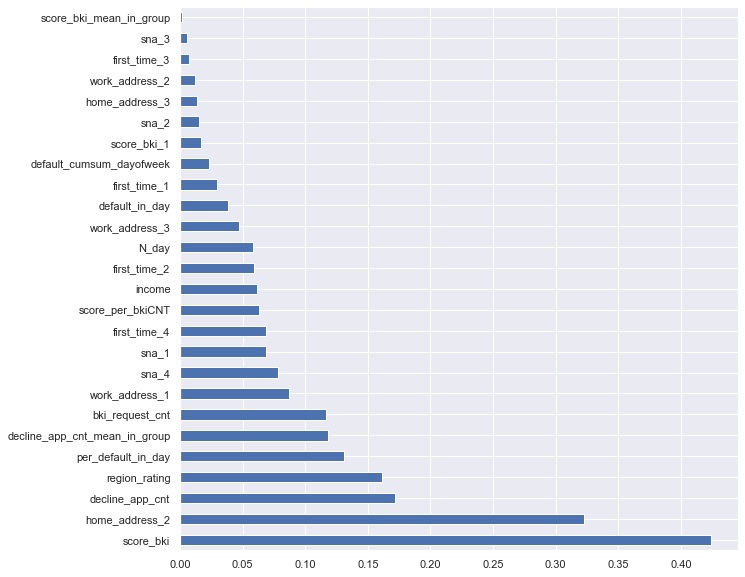

In [65]:
#Пост-обработка данных
X_trn,X_val,Y_trn,Y_val,train_columns, X_test_1 = prepare_toML(df)
#Модель линейной регрессии
model_1 = ML_LinearRegres(X_trn,X_val,Y_trn,Y_val,train_columns)

***Видно, что recall очень низкий, а значит банк выдает много кредитов, которые будут признаны дефолтными (то есть он почти всем подряд раздает кредиты). При этом кредиты, которые выплатятся алгоритм считает вполне успешно. Сильного падения метрик на валидационной выборке не наблюдается, поэтому можно судить, что переобучения нету.***

***Попробуем применить сэмплирование, чтобы сбалансировать выборку по признаку default.***

## 5.2) Логистическая регрессия, сбалансированная under

Параметры лучшей модели: {'C': 1e-05, 'max_iter': 5, 'penalty': 'l2'}
TRAIN:
Accuracy:     0.649
Recall:       0.655
Precision:    0.647
F1-score:     0.651
Log-loss:     12.112
RocAuc-score: 0.707
VALID:
Accuracy:     0.645
Recall:       0.637
Precision:    0.649
F1-score:     0.643
Log-loss:     12.254
RocAuc-score: 0.697


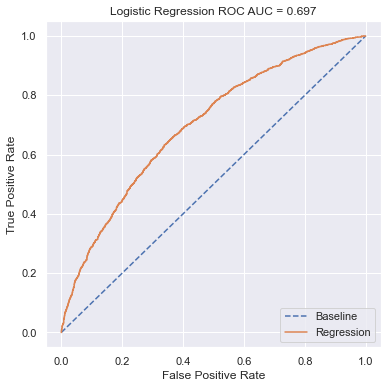

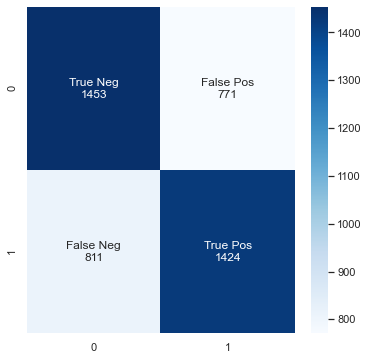

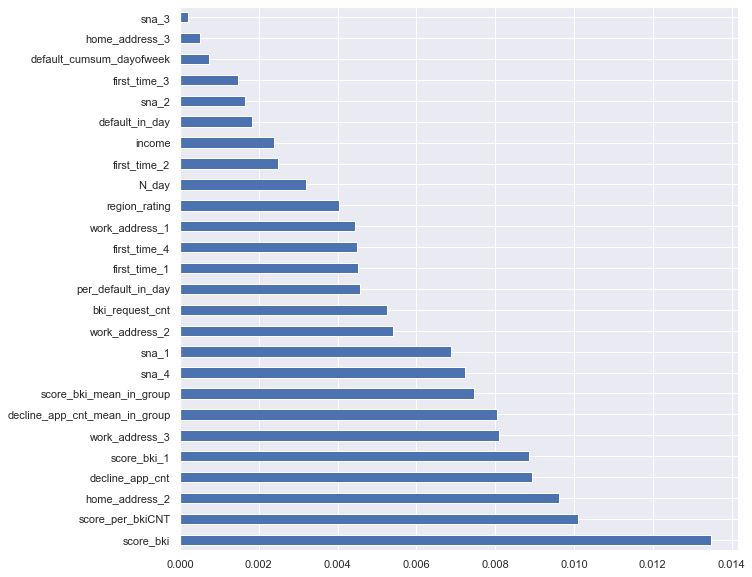

In [66]:
#Пост-обработка данных
X_trn,X_val,Y_trn,Y_val,train_columns, X_test_2 = prepare_toML(df,sampler='under')
#Модель линейной регрессии
model_2 = ML_LinearRegres(X_trn,X_val,Y_trn,Y_val,train_columns)

***Видно, что модель на валидационной выборке стала вести себя чуть хуже. Но при этом часть тренировочной выборки вообще отсеялась и результат будет сильно зависеть от того какие именно преценденты отсеялись. В данном случае значительно вырос recall, что говорит о том, что алгоритм стал лучше определять дефолтных клиентов, но при этом возросли случае ложно-положительные, когда человек выплатит кредит, а его ему не дают.***

## 5.3) Логистическая регрессия, сбалансированная over

Параметры лучшей модели: {'C': 0.1, 'max_iter': 25, 'penalty': 'l2'}
TRAIN:
Accuracy:     0.659
Recall:       0.655
Precision:    0.661
F1-score:     0.658
Log-loss:     11.761
RocAuc-score: 0.720
VALID:
Accuracy:     0.664
Recall:       0.656
Precision:    0.667
F1-score:     0.661
Log-loss:     11.617
RocAuc-score: 0.726


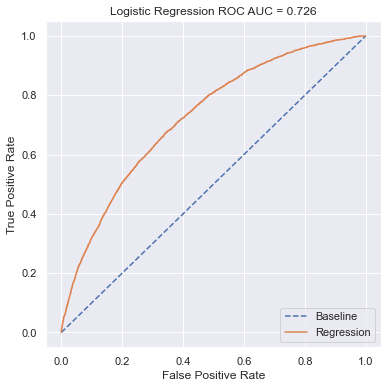

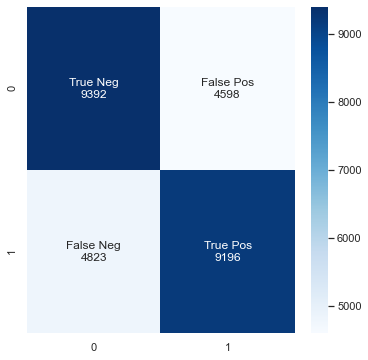

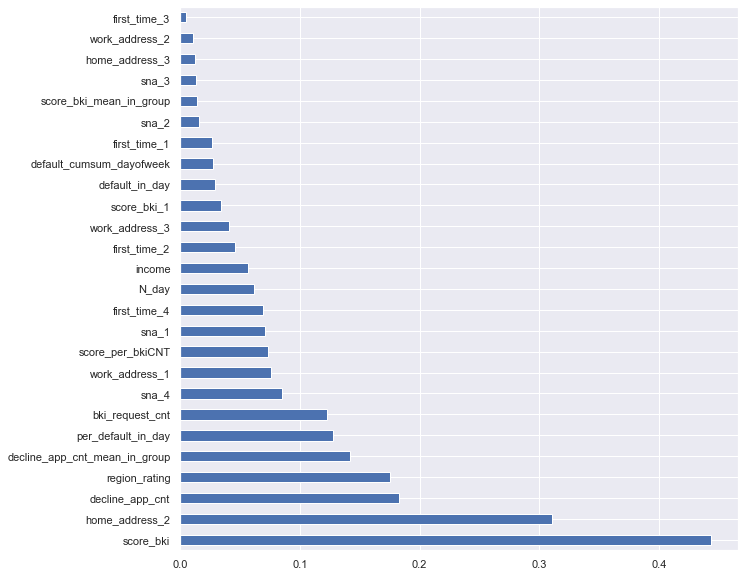

In [67]:
#Пост-обработка данных
X_trn,X_val,Y_trn,Y_val,train_columns, X_test_3 = prepare_toML(df,sampler='over')
#Модель линейной регрессии
model_3 = ML_LinearRegres(X_trn,X_val,Y_trn,Y_val,train_columns)

***Вывод аналогичный предыдущему пункту, за исключением того, что наблюдается малый скачок в метрике на валидационной выборке.***

## 5.4) Логистическая регрессия, сбалансированная over с учетом выбросов по decline_app_cnt

Параметры лучшей модели: {'C': 1000.0, 'max_iter': 15, 'penalty': 'l2'}
TRAIN:
Accuracy:     0.707
Recall:       0.634
Precision:    0.743
F1-score:     0.684
Log-loss:     10.119
RocAuc-score: 0.789
VALID:
Accuracy:     0.700
Recall:       0.631
Precision:    0.732
F1-score:     0.678
Log-loss:     10.350
RocAuc-score: 0.780


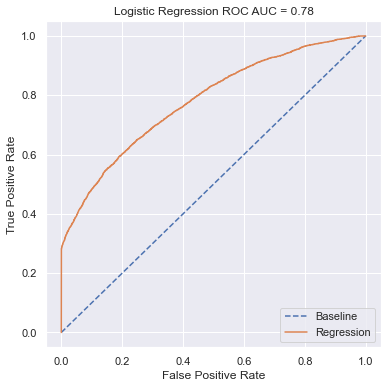

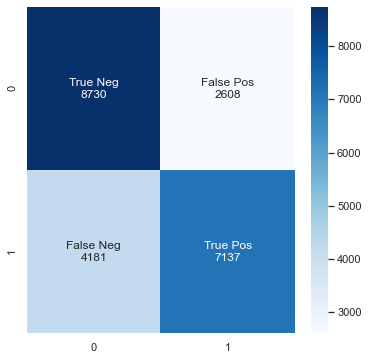

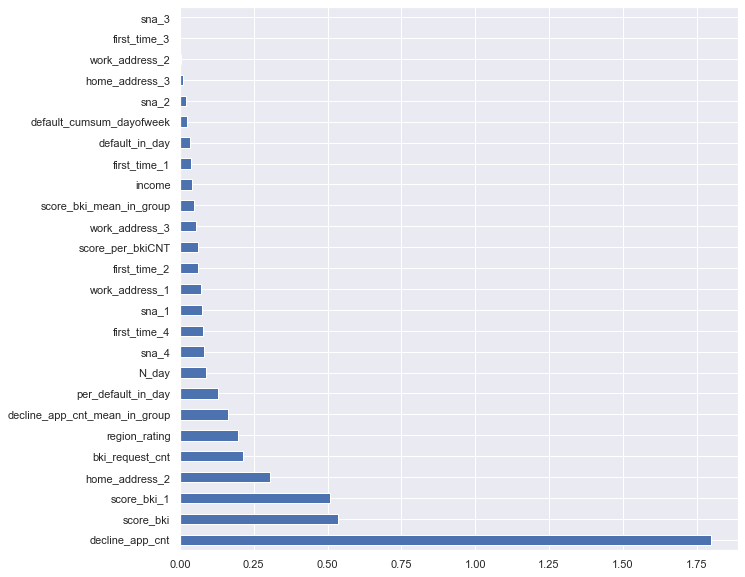

In [68]:
#Пост-обработка данных
X_trn,X_val,Y_trn,Y_val,train_columns, X_test_4 = prepare_toML(df_for_test,sampler='over')
#Модель линейной регрессии
model_4 = ML_LinearRegres(X_trn,X_val,Y_trn,Y_val,train_columns)

***Видно, что метрика значительно выросла по сравнению с прошлыми результатами, но при этом на тестовой выборке для Kaggle все стало сильно хуже в сравнении с пунктом 5.3. Вывод об этом написан далее.***

## 5.5) Дерево решений, несбалансированная

***Помимо логистической регрессии имеются куча других моделей. Все их я смотреть не буду, но одно из них для сравнения возьму - дерево решений. Случайный лес пока рассматривать не буду.***

Параметры лучшей модели: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 5}
TRAIN:
Accuracy:     0.892
Recall:       0.338
Precision:    0.738
F1-score:     0.464
Log-loss:     3.733
RocAuc-score: 0.893
VALID:
Accuracy:     0.833
Recall:       0.133
Precision:    0.264
F1-score:     0.177
Log-loss:     5.774
RocAuc-score: 0.622


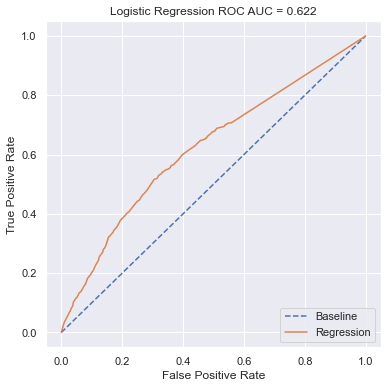

In [69]:
#Пост-обработка данных
X_trn,X_val,Y_trn,Y_val,train_columns, X_test_5 = prepare_toML(df)
#Дерево-решений
model_5 = ML_ClassTree(X_trn,X_val,Y_trn,Y_val,train_columns)

***Наблюдается значительное падение метрик на валидационной выборке, что говорит о переробучении модели. Попробуем провести sampling, чтобы решить данную пробему.***

## 5.6) Дерево решений, сбалансированная under

Параметры лучшей модели: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 5}
TRAIN:
Accuracy:     0.714
Recall:       0.706
Precision:    0.718
F1-score:     0.712
Log-loss:     9.867
RocAuc-score: 0.800
VALID:
Accuracy:     0.617
Recall:       0.583
Precision:    0.626
F1-score:     0.604
Log-loss:     13.246
RocAuc-score: 0.658


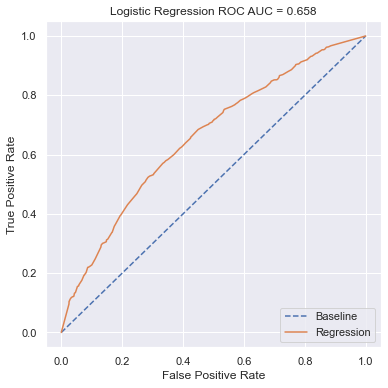

In [70]:
#Пост-обработка данных
X_trn,X_val,Y_trn,Y_val,train_columns, X_test_6 = prepare_toML(df,sampler='under')
#Дерево-решений
model_6 = ML_ClassTree(X_trn,X_val,Y_trn,Y_val,train_columns)

***При under sampling результат сильно будет зависеть от прецендентов, которые войдут в тренировочную выборку, что в конечном итоге плохо сказывается на итоговой метрике. В данном случае также наблюдается переобучение или в данном случае обучение не на тех данных (случайный выбор прецендентов при under-sampling не учитывает разбиение по группам номинативных признаков - баланс между тренировочной и валидационными выборками нарушается).***

## 5.7) Дерево решений, сбалансированная over

Параметры лучшей модели: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 5}
TRAIN:
Accuracy:     0.806
Recall:       0.868
Precision:    0.772
F1-score:     0.817
Log-loss:     6.702
RocAuc-score: 0.903
VALID:
Accuracy:     0.754
Recall:       0.838
Precision:    0.718
F1-score:     0.773
Log-loss:     8.505
RocAuc-score: 0.835


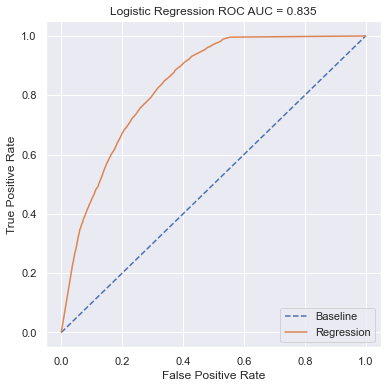

In [71]:
#Пост-обработка данных
X_trn,X_val,Y_trn,Y_val,train_columns, X_test_7 = prepare_toML(df,sampler='over')
#Дерево-решений
model_7 = ML_ClassTree(X_trn,X_val,Y_trn,Y_val,train_columns)

***При over sampling наоборот наблюдается повышение метрик по сравнению с моделями логистической регрессии. Стоит отметить то, что подбор оптимальных гиперпараметров скатывается в решение с большой глубиной и малым числом min_samples_leaf/split. При этом результат на Kaggle значительно упал, что может говорить о переобучении модели для тестовой выборки.***

## 5.8) Дерево решений, сбалансированная over с учетом выбросов по decline_app_cnt

Параметры лучшей модели: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 5}
TRAIN:
Accuracy:     0.814
Recall:       0.858
Precision:    0.789
F1-score:     0.822
Log-loss:     6.428
RocAuc-score: 0.917
VALID:
Accuracy:     0.767
Recall:       0.830
Precision:    0.737
F1-score:     0.781
Log-loss:     8.043
RocAuc-score: 0.867


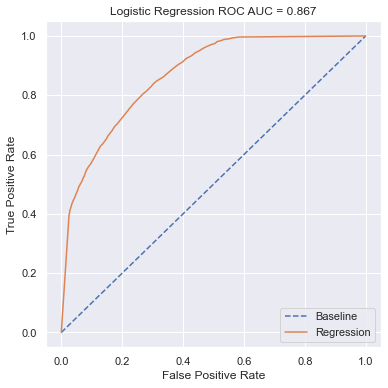

In [72]:
#Пост-обработка данных
X_trn,X_val,Y_trn,Y_val,train_columns, X_test_8 = prepare_toML(df_for_test,sampler='over')
#Дерево-решений
model_8 = ML_ClassTree(X_trn,X_val,Y_trn,Y_val,train_columns)

***Аналогично случаю с логистической регрессией, наблюдается значительное повышение метрик, но конечный результат на Kaggle упал.***

## 5.9) Дерево решений, сбалансированная over, не глубокое дерево

***Чтобы бороться с переобучением изменим максимальную глубину дерева, при этом увеличив минимальное число элементов для разбиения узла и создания узла.***

Параметры лучшей модели: {'max_depth': 7, 'min_samples_leaf': 400, 'min_samples_split': 1800}
TRAIN:
Accuracy:     0.655
Recall:       0.673
Precision:    0.650
F1-score:     0.661
Log-loss:     11.905
RocAuc-score: 0.718
VALID:
Accuracy:     0.654
Recall:       0.670
Precision:    0.650
F1-score:     0.660
Log-loss:     11.948
RocAuc-score: 0.717


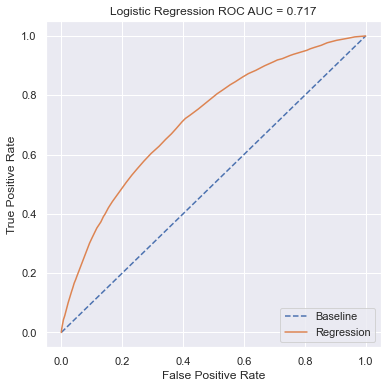

In [73]:
#Пост-обработка данных
X_trn,X_val,Y_trn,Y_val,train_columns, X_test_9 = prepare_toML(df,sampler='over')
#Дерево-решений
model_9 = ML_ClassTree(X_trn,X_val,Y_trn,Y_val,train_columns,deep=False)

***Это улучшило результат на Kaggle по сравнению с более глубокими деревьями, но все равно не дотянуло до модели логистической регрессии.***

# 6) Sample Submissions (to Kaggle)

In [74]:
best_model = model_9
X_test = X_test_9
#Предсказание на test
Y_pred_test = best_model.predict_proba(X_test)[:,1]
#Вывод в файл
sample_submission = pd.concat([df_test['client_id'].to_frame(),
                               pd.DataFrame(Y_pred_test,index=df_test.index).rename(columns={0:'default'})],
                              axis=1)
sample_submission.to_csv('submission.csv', index=False)
#Осмотр данных
sample_submission.head()
sample_submission.shape

(36349, 2)

***Результаты на Kaggle для моделей следующие: 1 - 0.721, 2 - 0.706, 3 - 0.722, 4 - 0.701, 5 - 0.612, 6 - 0.662, 7 - 0.620, 8 - 0.627, 9 - 0.688.***

***Лучшая модель по тестовой выборке: 3. Лучшая модель по валидационной выборке: 8 и 4 (если не убирать выбросы по decline_app_cnt, то 7 и 3). По итогу работы можно сделать вывод, что модель, построенная по несбаланированной выборке, дает почти всегда кредит и практически не угадывает дефолт (низкий recall).***

***Применение under-sampling стоит оптимизировать, чтобы сделать выборку более сбалансированной по второстепенным категориальным параметрам. Применение over-sampling позволяет решать задачу переобучения и низкого recall, при этом accuracy, recall и precision имеют примерно одинаковое значение, что означает, что модель примерно в равной пропорции неправильно определяет дефолтных клиентов, как и не дефолтных.***

***Для улучшения модели стоит поработать с линейными комбинациями признаков, узнать больше о значениях категориальных признаков, попробовать другие модели и попробовать самостоятельно отделить выбросы (или переписать алгоритм, задав ему в нужной последовательности признаки, чтобы удалялись сначала важные преценденты, а затем нет).***

***По результатам первого запуска на Kaggle был получен результат 0.734 (в данном ноутбуке не представлен, так как был получен до нормализации, удаления выбросов, feature engineering и так далее). Все дальнейшие 60+ попыток не привели ни к чему хорошему, за исключением скромного повышения до 0.736.***

Результаты для Kaggle высчитывались НЕ на платформе Kaggle, а на собственном ПК.

Выполнил студент группы DSPR-38: Светлаков Сергей. Kaggle-name: MirtosSergey. Ссылка на Git-Hub: https://github.com/MirtosSergey/SF_project/tree/master.